## Clustering by Body Type

In [1]:
# load 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import sqlite3
import seaborn as sns
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import requests   
import shutil      
import datetime
from scipy.stats import norm
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import os
import winsound
os.chdir('C:\\Users\\Travis\\OneDrive\\Data Science\\Personal_Projects\\Sports\\Ufc_Prediction_V2')
import warnings
warnings.filterwarnings('ignore')
import streamlit as st
from selenium.common.exceptions import WebDriverException
import winsound

sound_file = "data/audio/Jobs Done.wav"

def play_jobs_done():
    winsound.PlaySound(sound_file, winsound.SND_FILENAME)


In [2]:
df  = pd.read_csv('data/final/aggregates/Double_Fights_DF_V14.csv') 

In [3]:
df.head()

,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,B_Sig_strike_percent,...,Dif_Opp_Avg_Body_Strikes_land_per_round,Dif_Opp_Avg_Body_Strikes_att_per_round,Dif_Opp_Avg_Leg_Strikes_land_per_round,Dif_Opp_Avg_Leg_Strikes_att_per_round,Dif_Opp_Avg_Distance_Strikes_land_per_round,Dif_Opp_Avg_Distance_Strikes_att_per_round,Dif_Opp_Avg_Clinch_Strikes_land_per_round,Dif_Opp_Avg_Clinch_Strikes_att_per_round,Dif_Opp_Avg_Ground_Strikes_land_per_round,Dif_Opp_Avg_Ground_Strikes_att_per_round
0,Holly Holm,Irene Aldana,0,0,154,301,69,185,0.51,0.37,...,-0.438261,-0.773091,-0.375092,-0.354364,-2.452268,-6.012022,0.171166,0.113466,-0.117277,-0.271253
1,Greg Hardy,Ben Sosoli,0,0,54,105,26,97,0.51,0.26,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,NaN,NaN
2,Jared Rosholt,Josh Copeland,0,0,22,45,9,36,0.48,0.25,...,-3.222222,-3.944444,-1.888889,-2.194444,-7.500000,-19.138889,-1.888889,-1.694444,-1.138889,-2.166667
3,Alistair Overeem,Stefan Struve,0,0,17,25,2,5,0.68,0.40,...,1.448693,1.796830,0.142988,0.268794,3.504557,9.869592,2.512546,3.503052,0.838169,0.800327
4,Nordine Taleb,Kyle Prepolec,0,0,90,201,52,153,0.44,0.33,...,-inf,-inf,-inf,-inf,-inf,-inf,NaN,NaN,-inf,-inf


In [4]:
# find player height and wingspan columns
height_cols = [col for col in df.columns if 'Height' in col or 'height' in col]
reach_cols = [col for col in df.columns if 'Reach' in col or 'reach' in col]
weightclass_cols = [col for col in df.columns if 'Weightclass' in col or 'weightclass' in col]

height_cols

['A_Height', 'B_Height', 'Dif_Height']

In [5]:
reach_cols

['A_Reach',
 'B_Reach',
 'Dif_Reach',
 'A_Leg_Reach',
 'B_Leg_Reach',
 'Dif_Leg_Reach',
 'A_Reach_NA',
 'B_Reach_NA',
 'Reach_NA',
 'A_Leg_Reach_NA',
 'B_Leg_Reach_NA',
 'Leg_Reach_NA']

In [6]:
weightclass_cols

['A_Typical_Weightclass',
 'B_Typical_Weightclass',
 'fight_weightclass',
 'A_Fight_in_Typical_Weightclass',
 'B_Fight_in_Typical_Weightclass']

In [7]:
# get unique Fighter_A version. drop duplicates
df2 = df.drop_duplicates(subset=['Fighter_A'], keep='first')


In [8]:
# add reach to height index
df2['Reach_to_Height'] = df2['A_Reach'] / df2['A_Height']

# add leg reach to height index
df2['Leg_Reach_to_Height'] = df2['A_Leg_Reach'] / df2['A_Height']

# add leg reach to reach index
df2['Leg_Reach_to_Reach'] = df2['A_Leg_Reach'] / df2['A_Height']

# add upper_body to height index
df2['Upper_Body_to_Height'] = (df2['A_Height'] - df2['A_Leg_Reach'])  / df2['A_Height']

In [9]:
size_cols = ['A_Height', 'A_Reach', 'A_Leg_Reach']
size_ratio_cols = ['Reach_to_Height', 'Leg_Reach_to_Height', 'Leg_Reach_to_Reach', 'Upper_Body_to_Height']

In [10]:
all_size_cols = size_cols + size_ratio_cols

In [11]:
# cluster fighters by height, reach, leg reach, and weightclass
from sklearn.cluster import KMeans

# cluster
kmeans = KMeans(n_clusters=5, random_state=0).fit(df2[size_cols])

# add cluster column to df
df2['size_cluser'] = kmeans.labels_

In [12]:
kmeans3 = KMeans(n_clusters=5, random_state=0).fit(df2[all_size_cols])

# add cluster column to df
df2['all_size_cluster'] = kmeans3.labels_

In [13]:
kmeans2 = KMeans(n_clusters=5, random_state=0).fit(df2[size_ratio_cols])
df2['size_ratio_cluster'] = kmeans2.labels_

In [14]:
df2

,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,B_Sig_strike_percent,...,Dif_Opp_Avg_Clinch_Strikes_att_per_round,Dif_Opp_Avg_Ground_Strikes_land_per_round,Dif_Opp_Avg_Ground_Strikes_att_per_round,Reach_to_Height,Leg_Reach_to_Height,Leg_Reach_to_Reach,Upper_Body_to_Height,size_cluser,all_size_cluster,size_ratio_cluster
0,Holly Holm,Irene Aldana,0,0,154,301,69,185,0.51,0.37,...,0.113466,-0.117277,-0.271253,1.014706,0.558824,0.558824,0.441176,2,2,0
1,Greg Hardy,Ben Sosoli,0,0,54,105,26,97,0.51,0.26,...,-inf,NaN,NaN,1.038961,0.571429,0.571429,0.428571,1,1,2
2,Jared Rosholt,Josh Copeland,0,0,22,45,9,36,0.48,0.25,...,-1.694444,-1.138889,-2.166667,1.013514,0.554054,0.554054,0.445946,4,4,0
3,Alistair Overeem,Stefan Struve,0,0,17,25,2,5,0.68,0.40,...,3.503052,0.838169,0.800327,1.052632,0.585526,0.585526,0.414474,1,1,1
4,Nordine Taleb,Kyle Prepolec,0,0,90,201,52,153,0.44,0.33,...,NaN,-inf,-inf,1.020548,0.575342,0.575342,0.424658,4,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7996,Viacheslav Borshchev,Marc Diakiese,0,0,12,21,17,20,0.57,0.85,...,inf,inf,inf,0.971831,0.584507,0.584507,0.415493,0,0,4
8067,Saidyokub Kakhramonov,Ronnie Lawrence,0,0,32,59,15,33,0.54,0.45,...,inf,NaN,NaN,1.014706,0.558824,0.558824,0.441176,2,2,0
8069,Matt Arroyo,Dan Cramer,0,0,16,25,24,68,0.64,0.35,...,NaN,NaN,NaN,1.027778,0.569444,0.569444,0.430556,4,4,2
8106,Joe Merritt,Alex Oliveira,0,0,23,39,11,33,0.58,0.33,...,inf,inf,inf,1.013889,0.569444,0.569444,0.430556,4,4,2


In [15]:
df2.size_ratio_cluster.value_counts()

2    728
4    281
1    265
0    189
3    150
Name: size_ratio_cluster, dtype: int64

In [16]:
# drop anybody without size_ratio_cols or with nan values
df3 = df2.dropna(subset=size_ratio_cols)

In [17]:
# check size_ratio_cluster dtype
df3['size_ratio_cluster'].dtype
# change it to int
df3['size_ratio_cluster'] = df3['size_ratio_cluster'].astype(int)

In [18]:
# 3d scatter plot with Leg_Reach_to_Height, Reach_to_Height, and Upper_Body_to_Height with plotly
import plotly.express as px
fig = px.scatter_3d(df3, x='Leg_Reach_to_Height', y='Reach_to_Height', z='Upper_Body_to_Height', color='size_ratio_cluster', opacity=0.5)
fig.show()


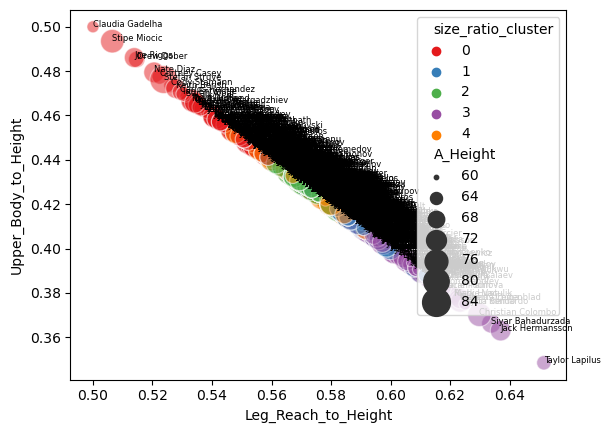

In [19]:
# plot clusters with seaborn scatter plot
sns.scatterplot(data=df3, x='Leg_Reach_to_Height', y='Upper_Body_to_Height', hue='size_ratio_cluster', size = 'A_Height', palette='Set1', alpha=0.5, sizes = (10, 400))
# add names to points
for i, txt in enumerate(df3['Fighter_A']):
    plt.annotate(txt, (df3['Leg_Reach_to_Height'].iloc[i], df3['Upper_Body_to_Height'].iloc[i]), size = 6)

# make plot larger
plt.rcParams["figure.figsize"] = (20,20)


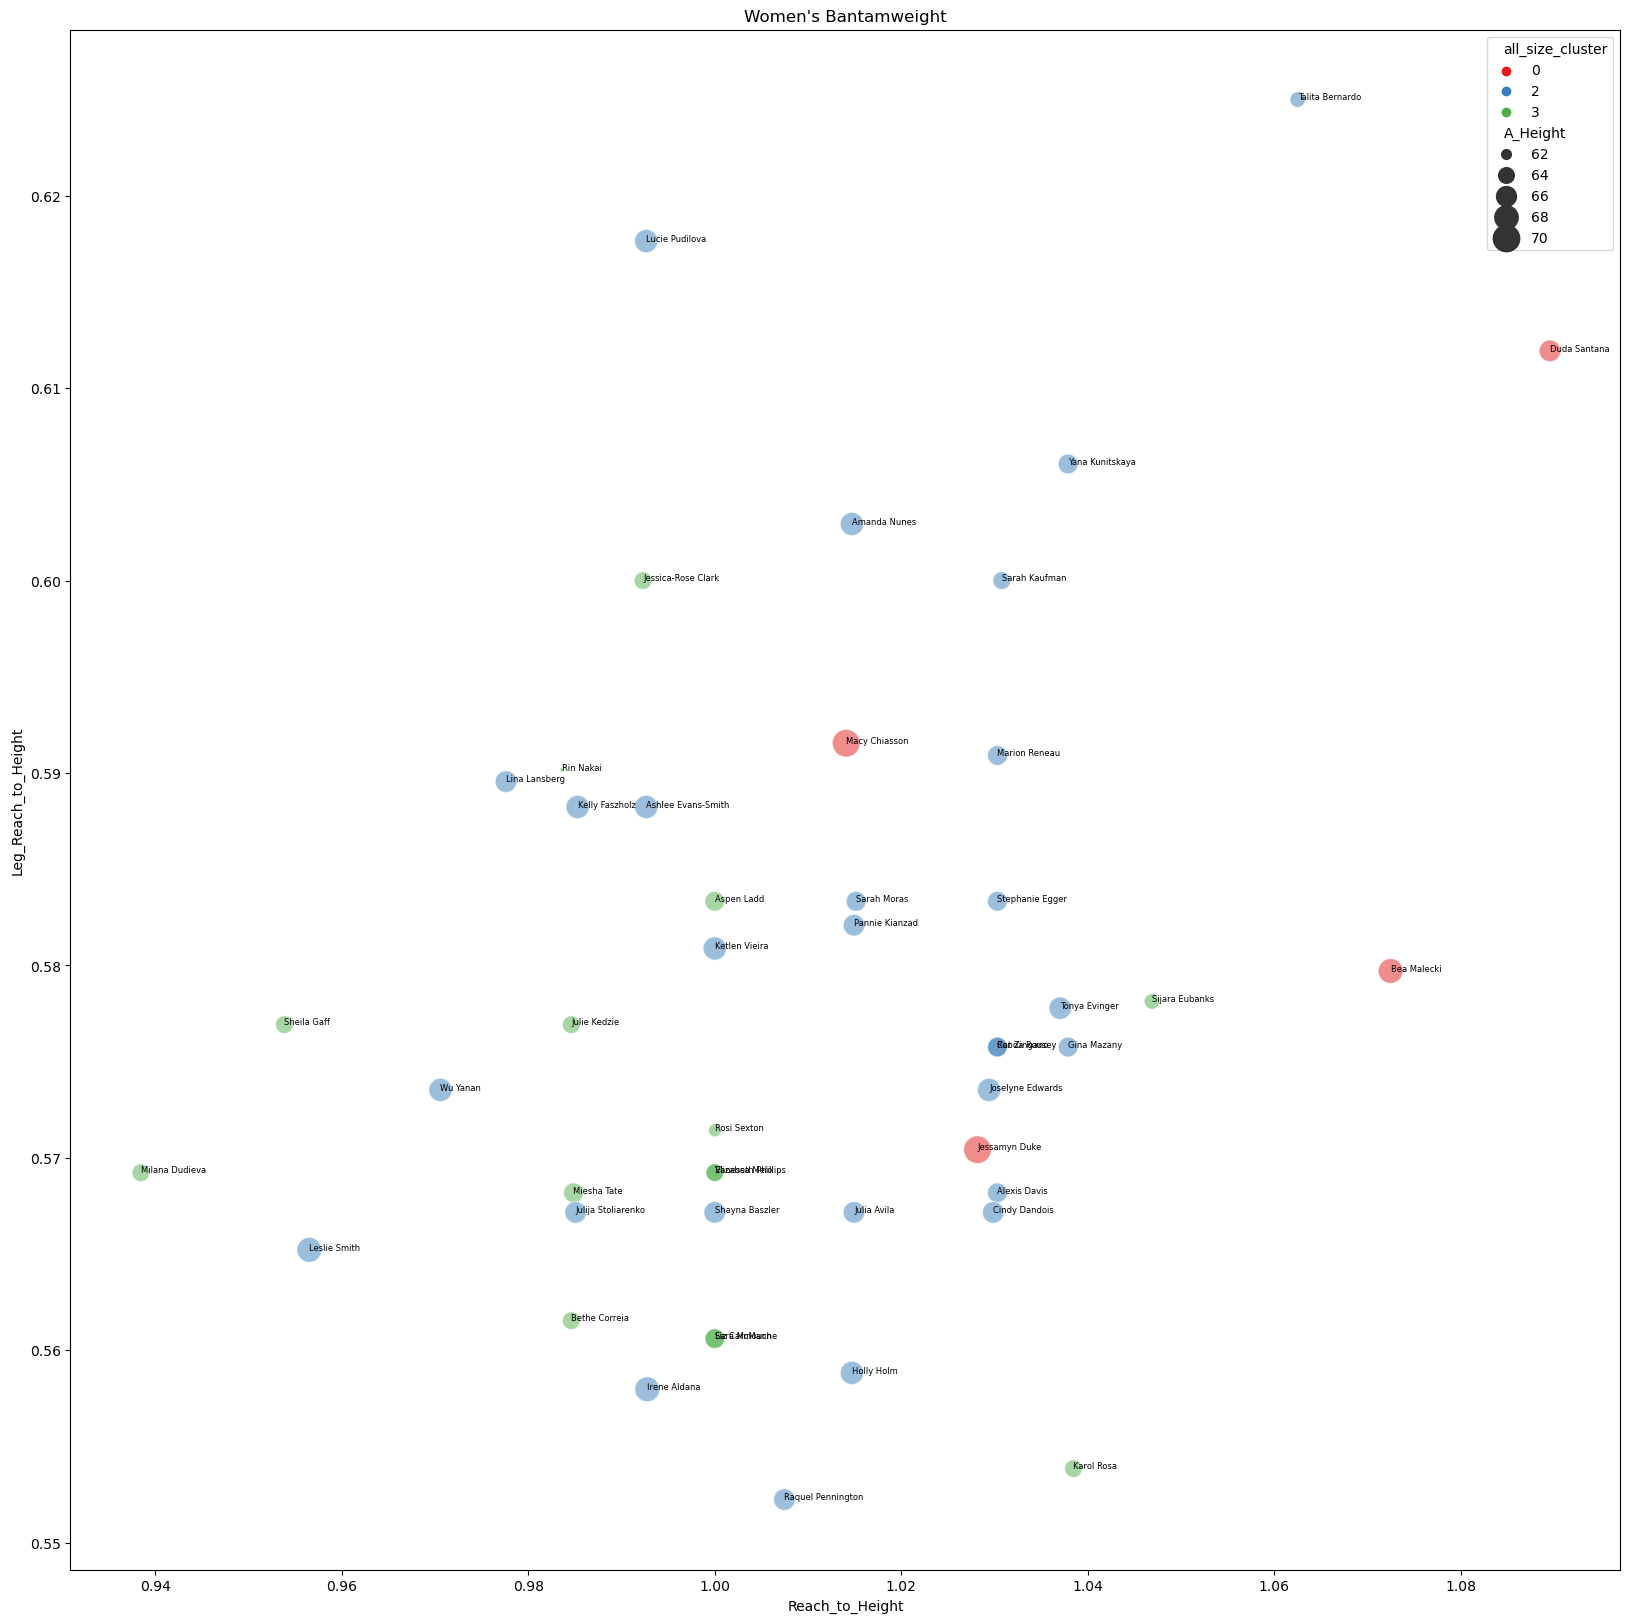

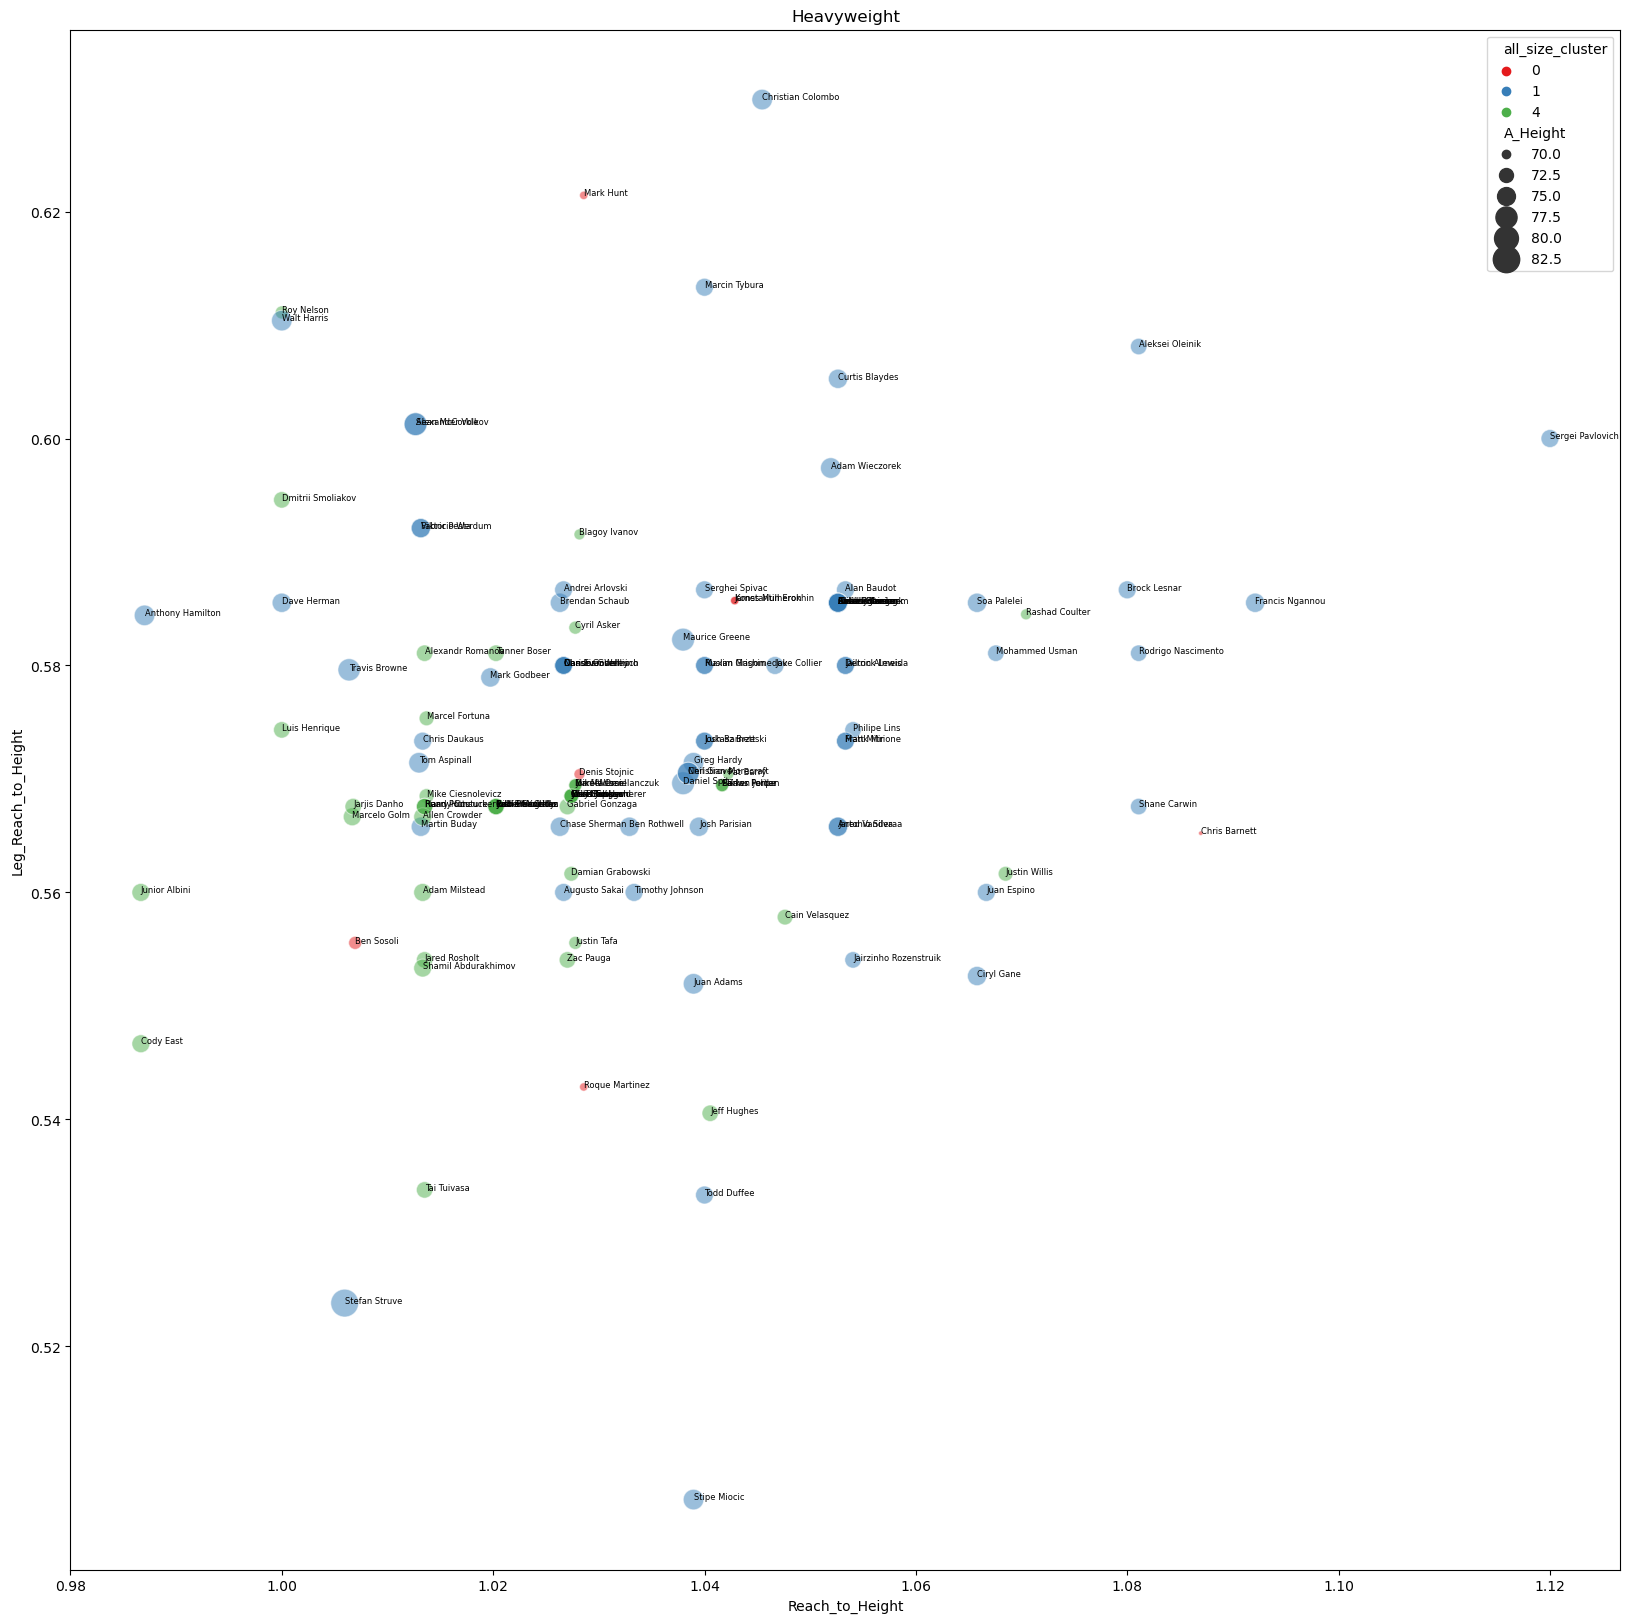

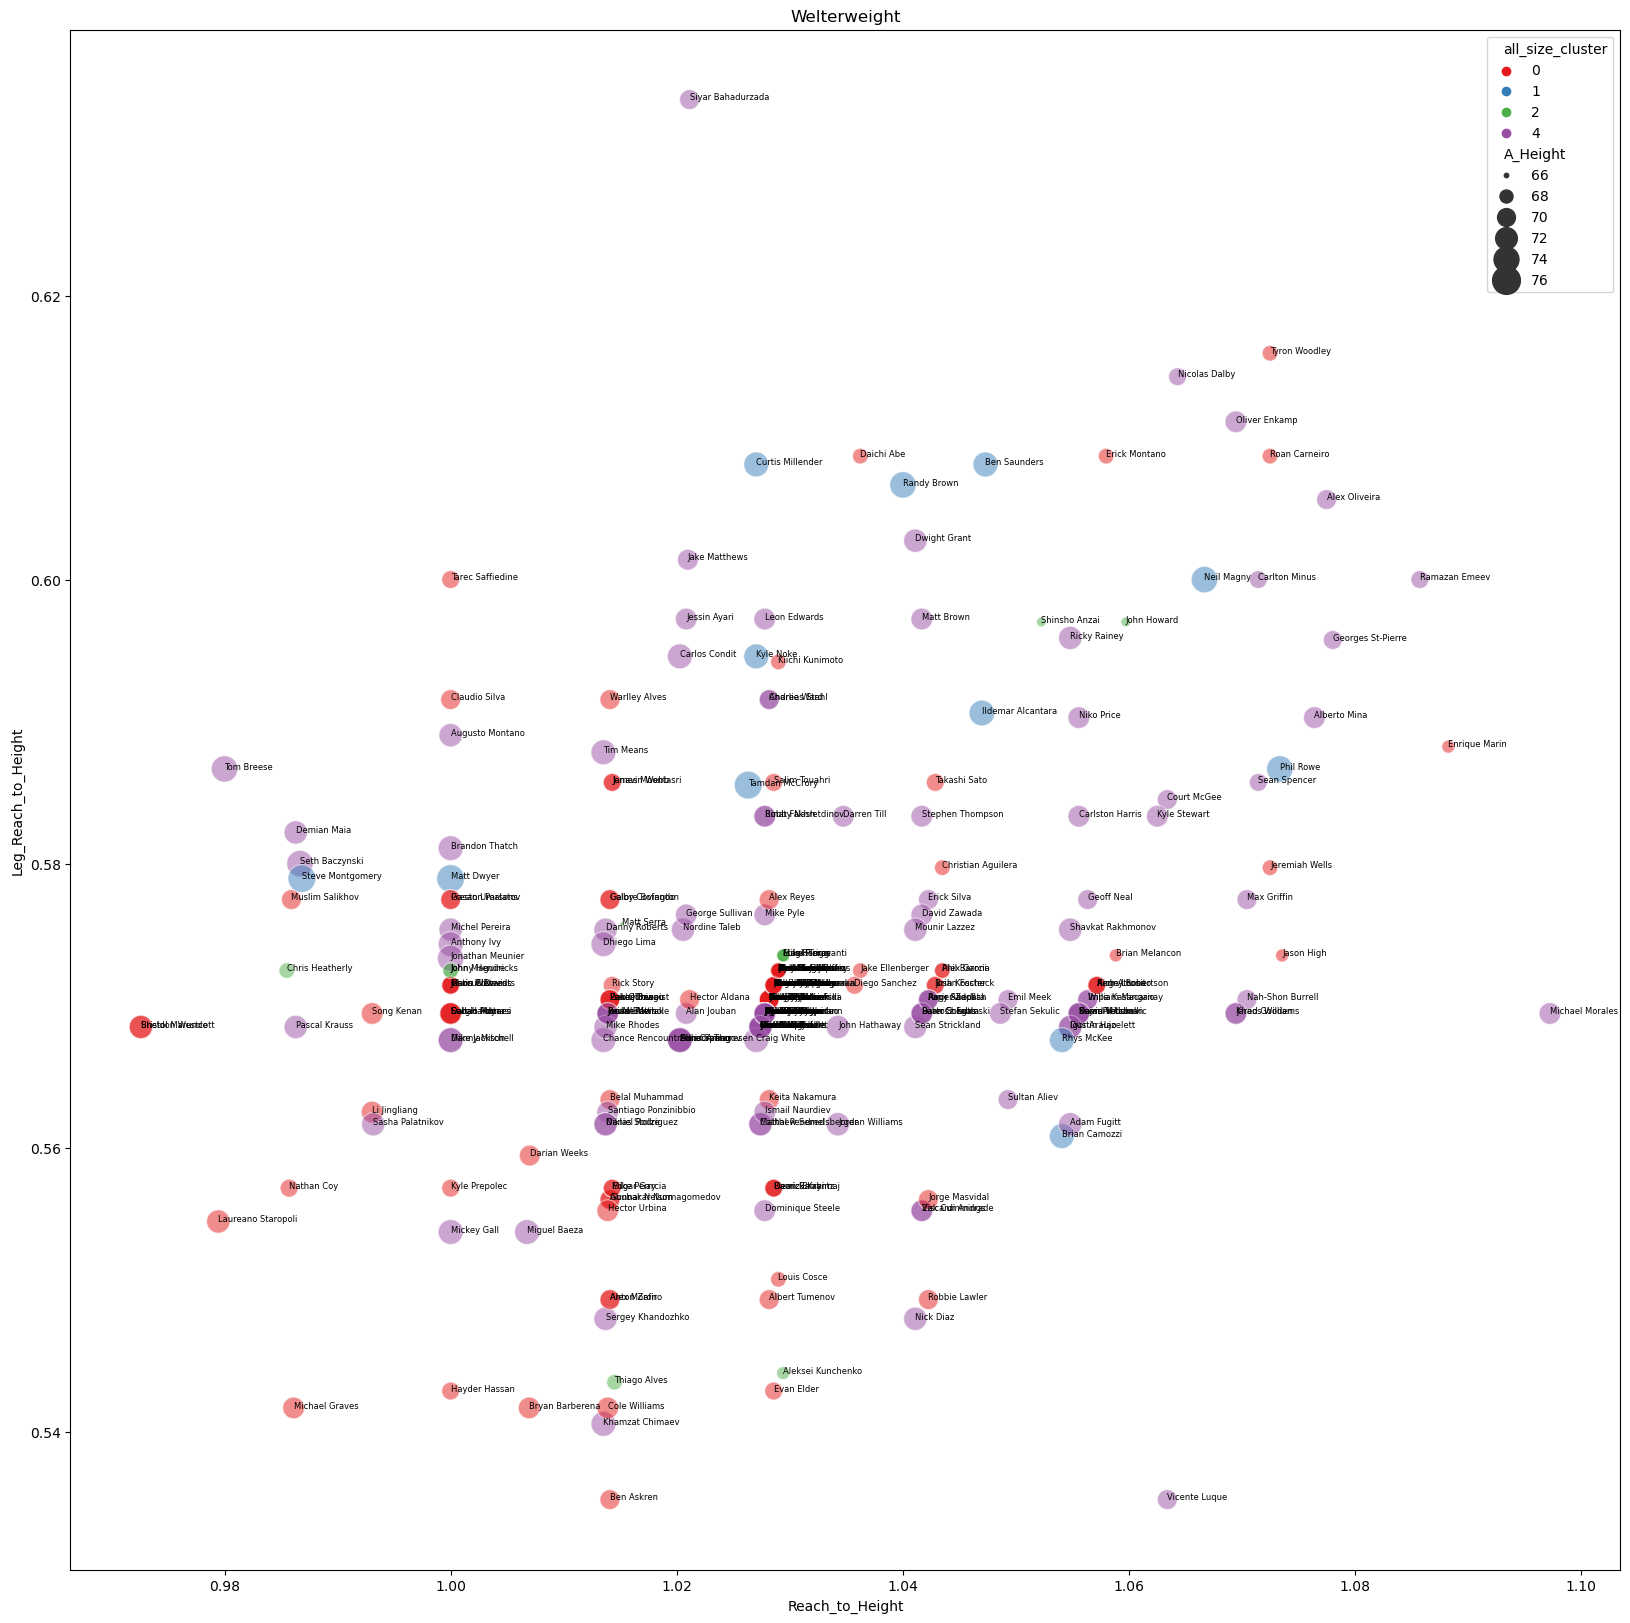

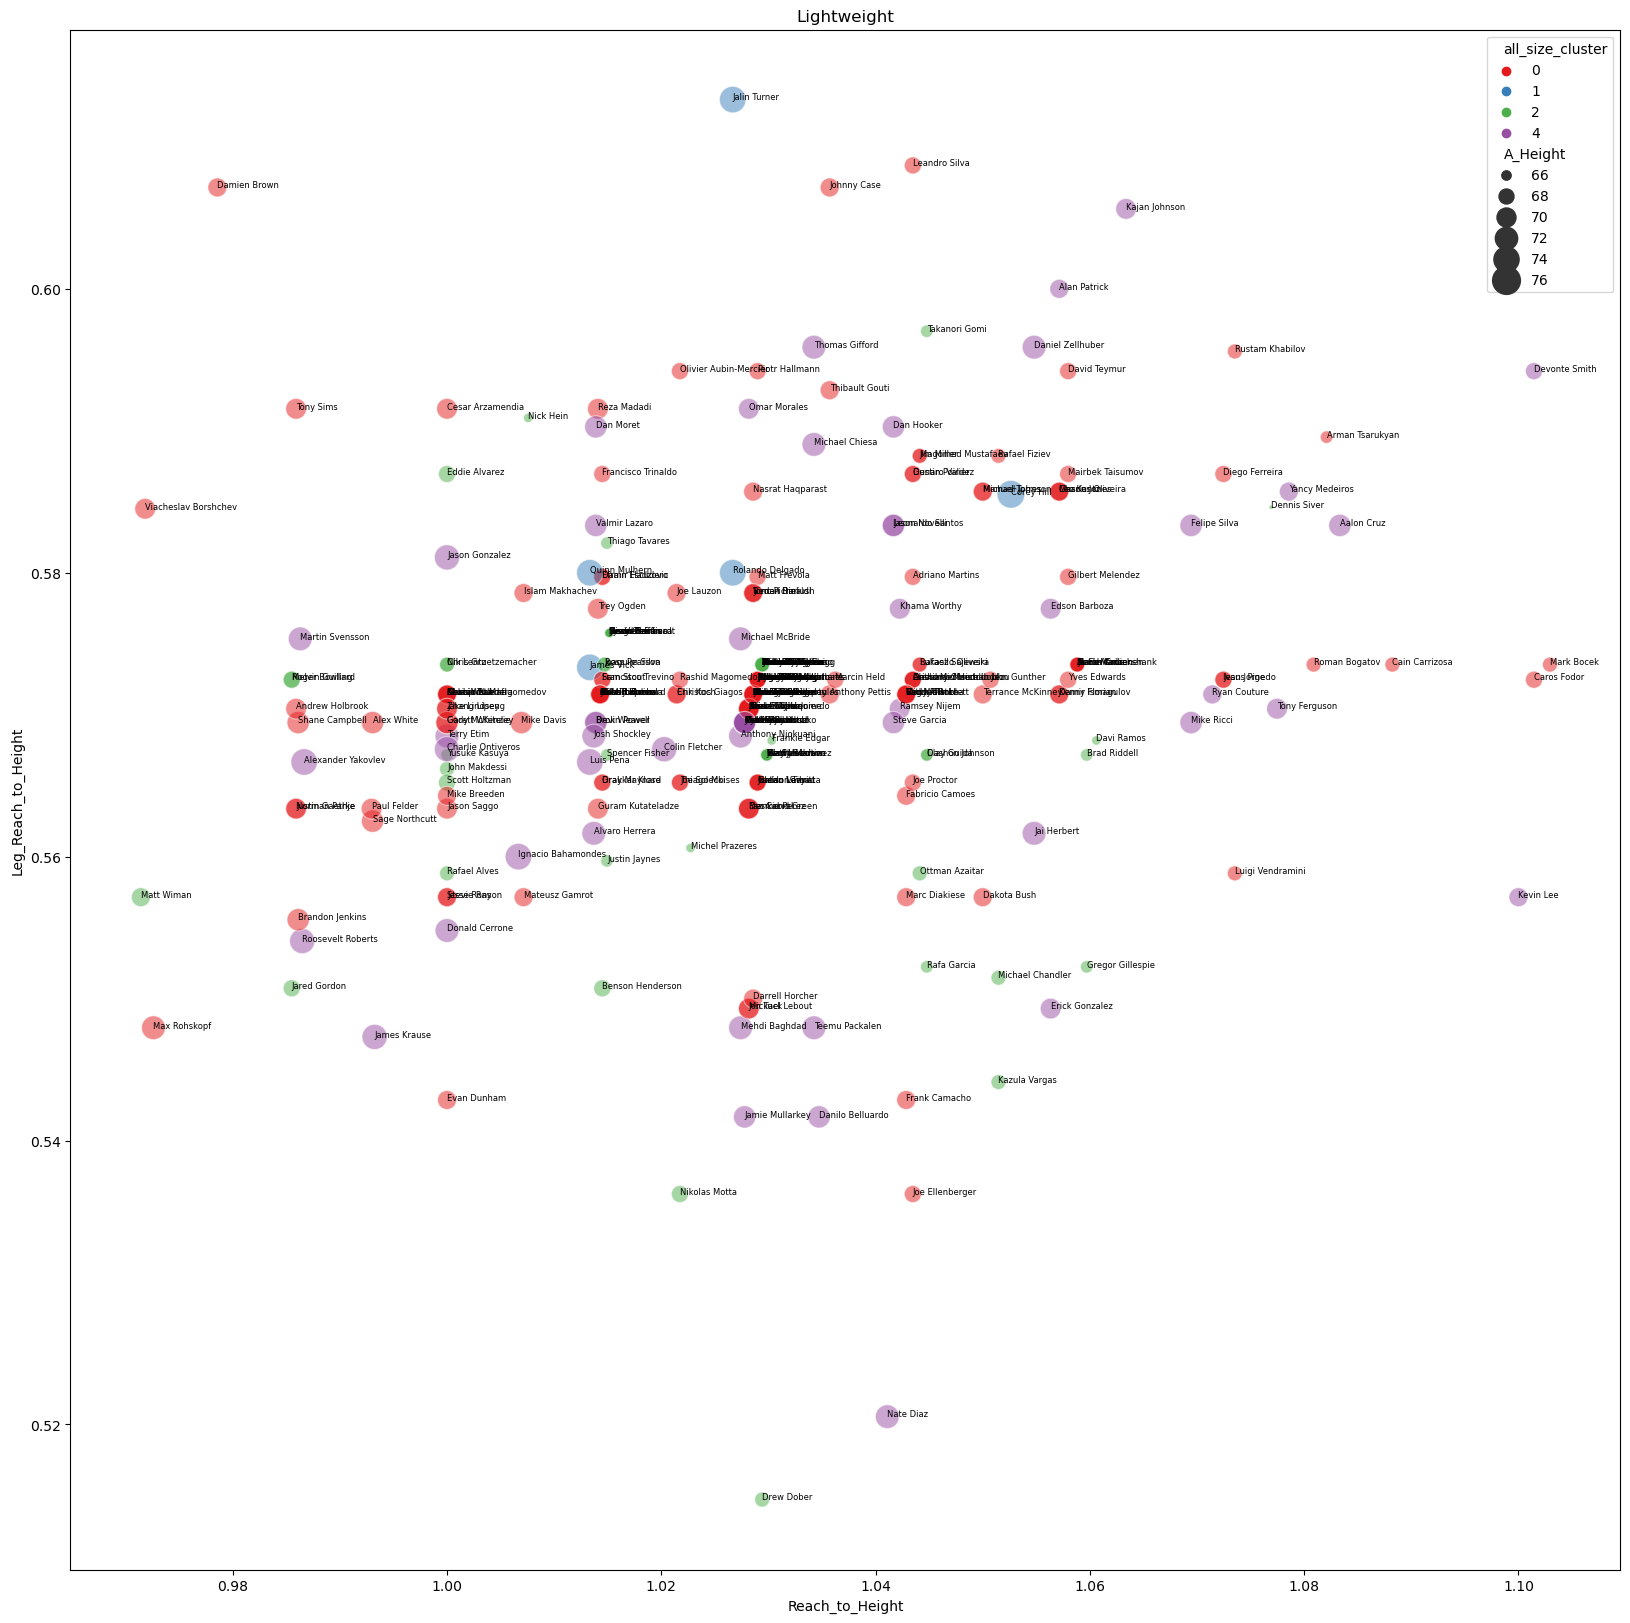

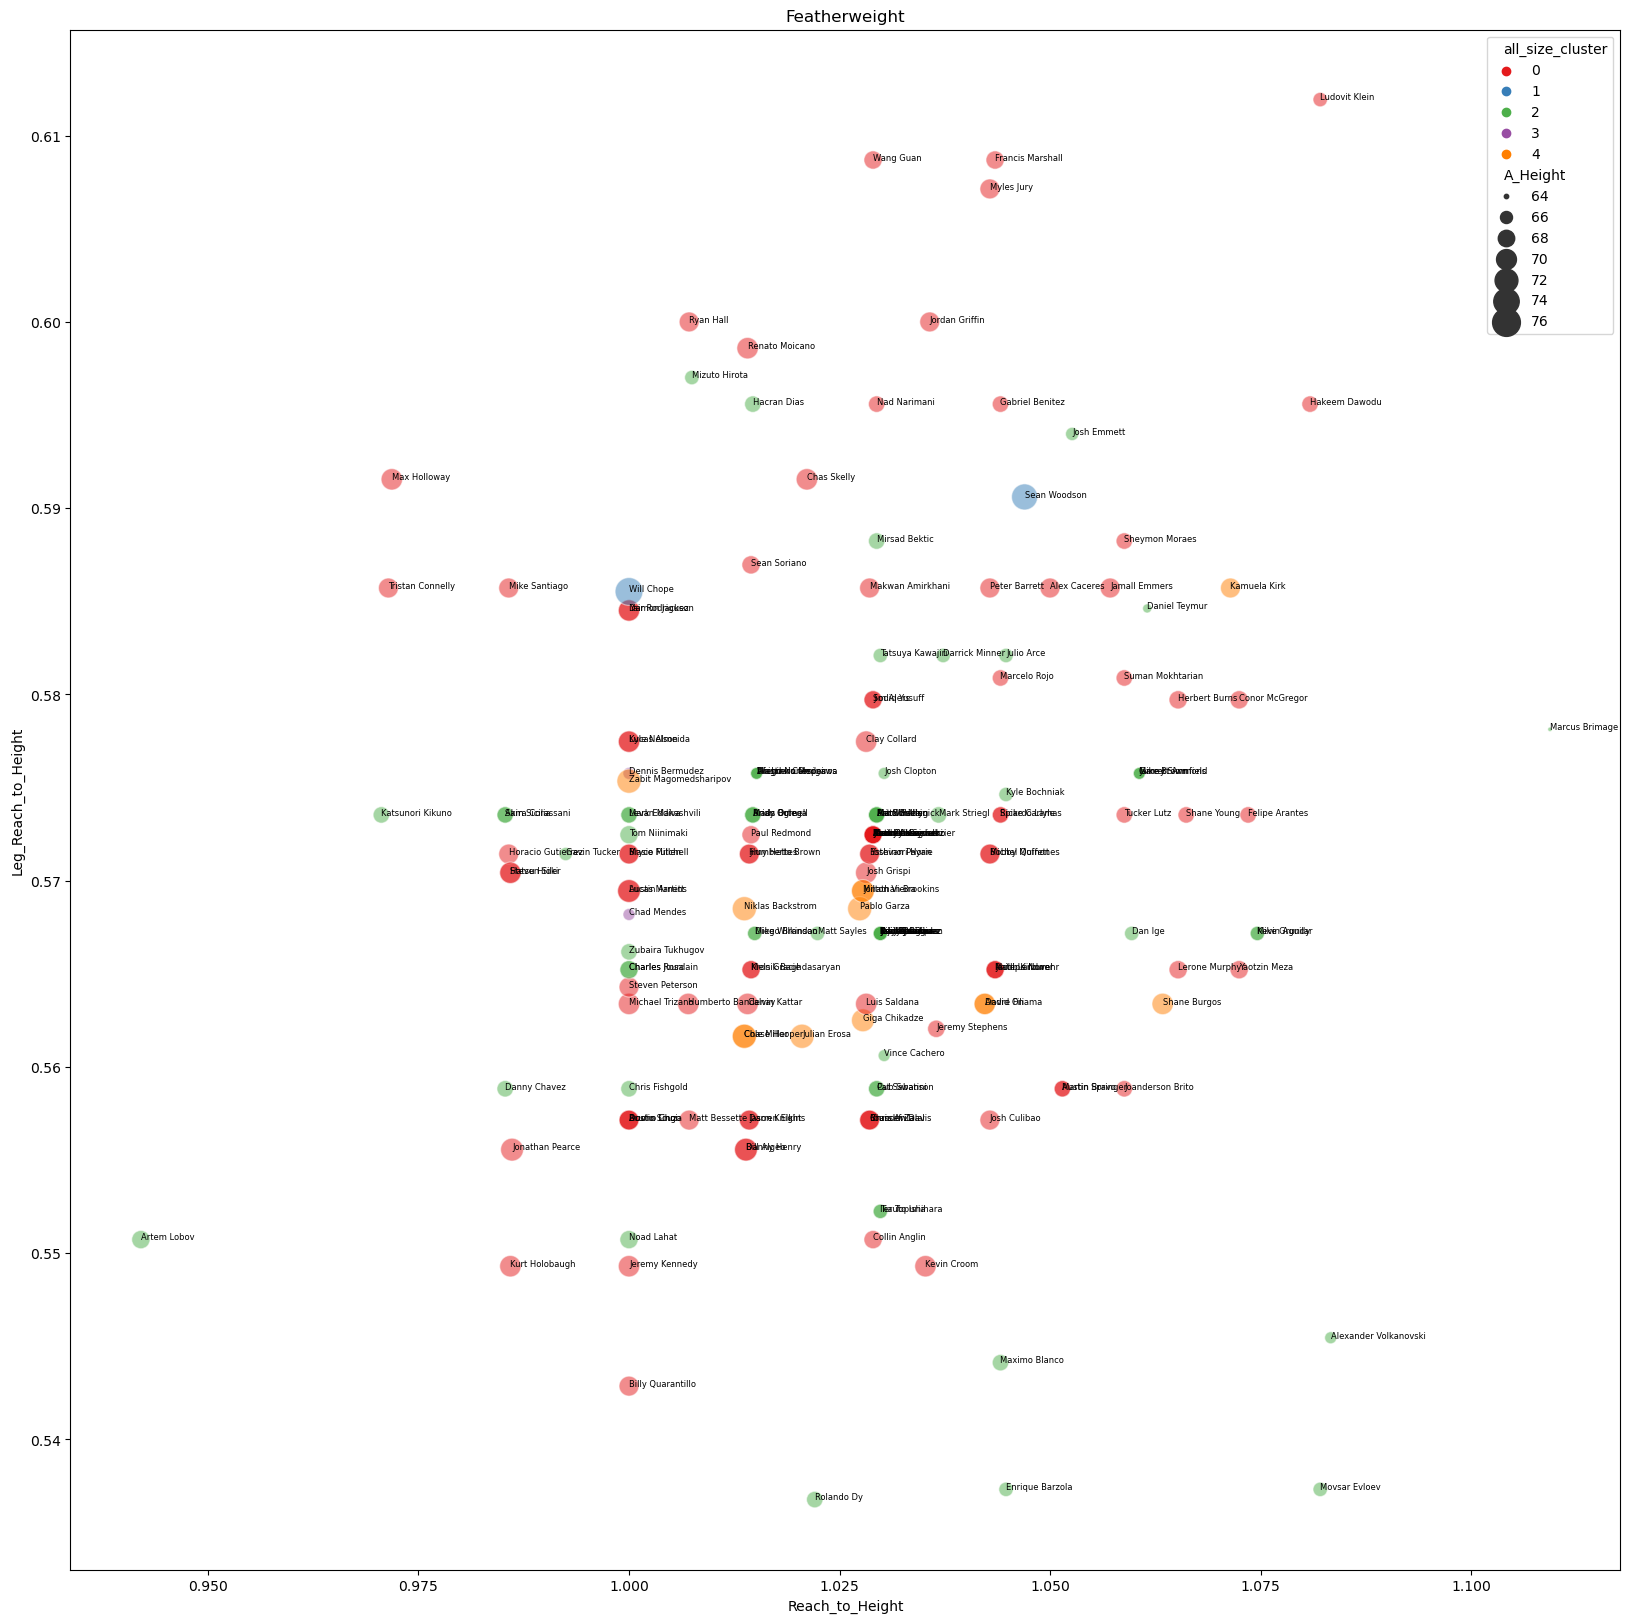

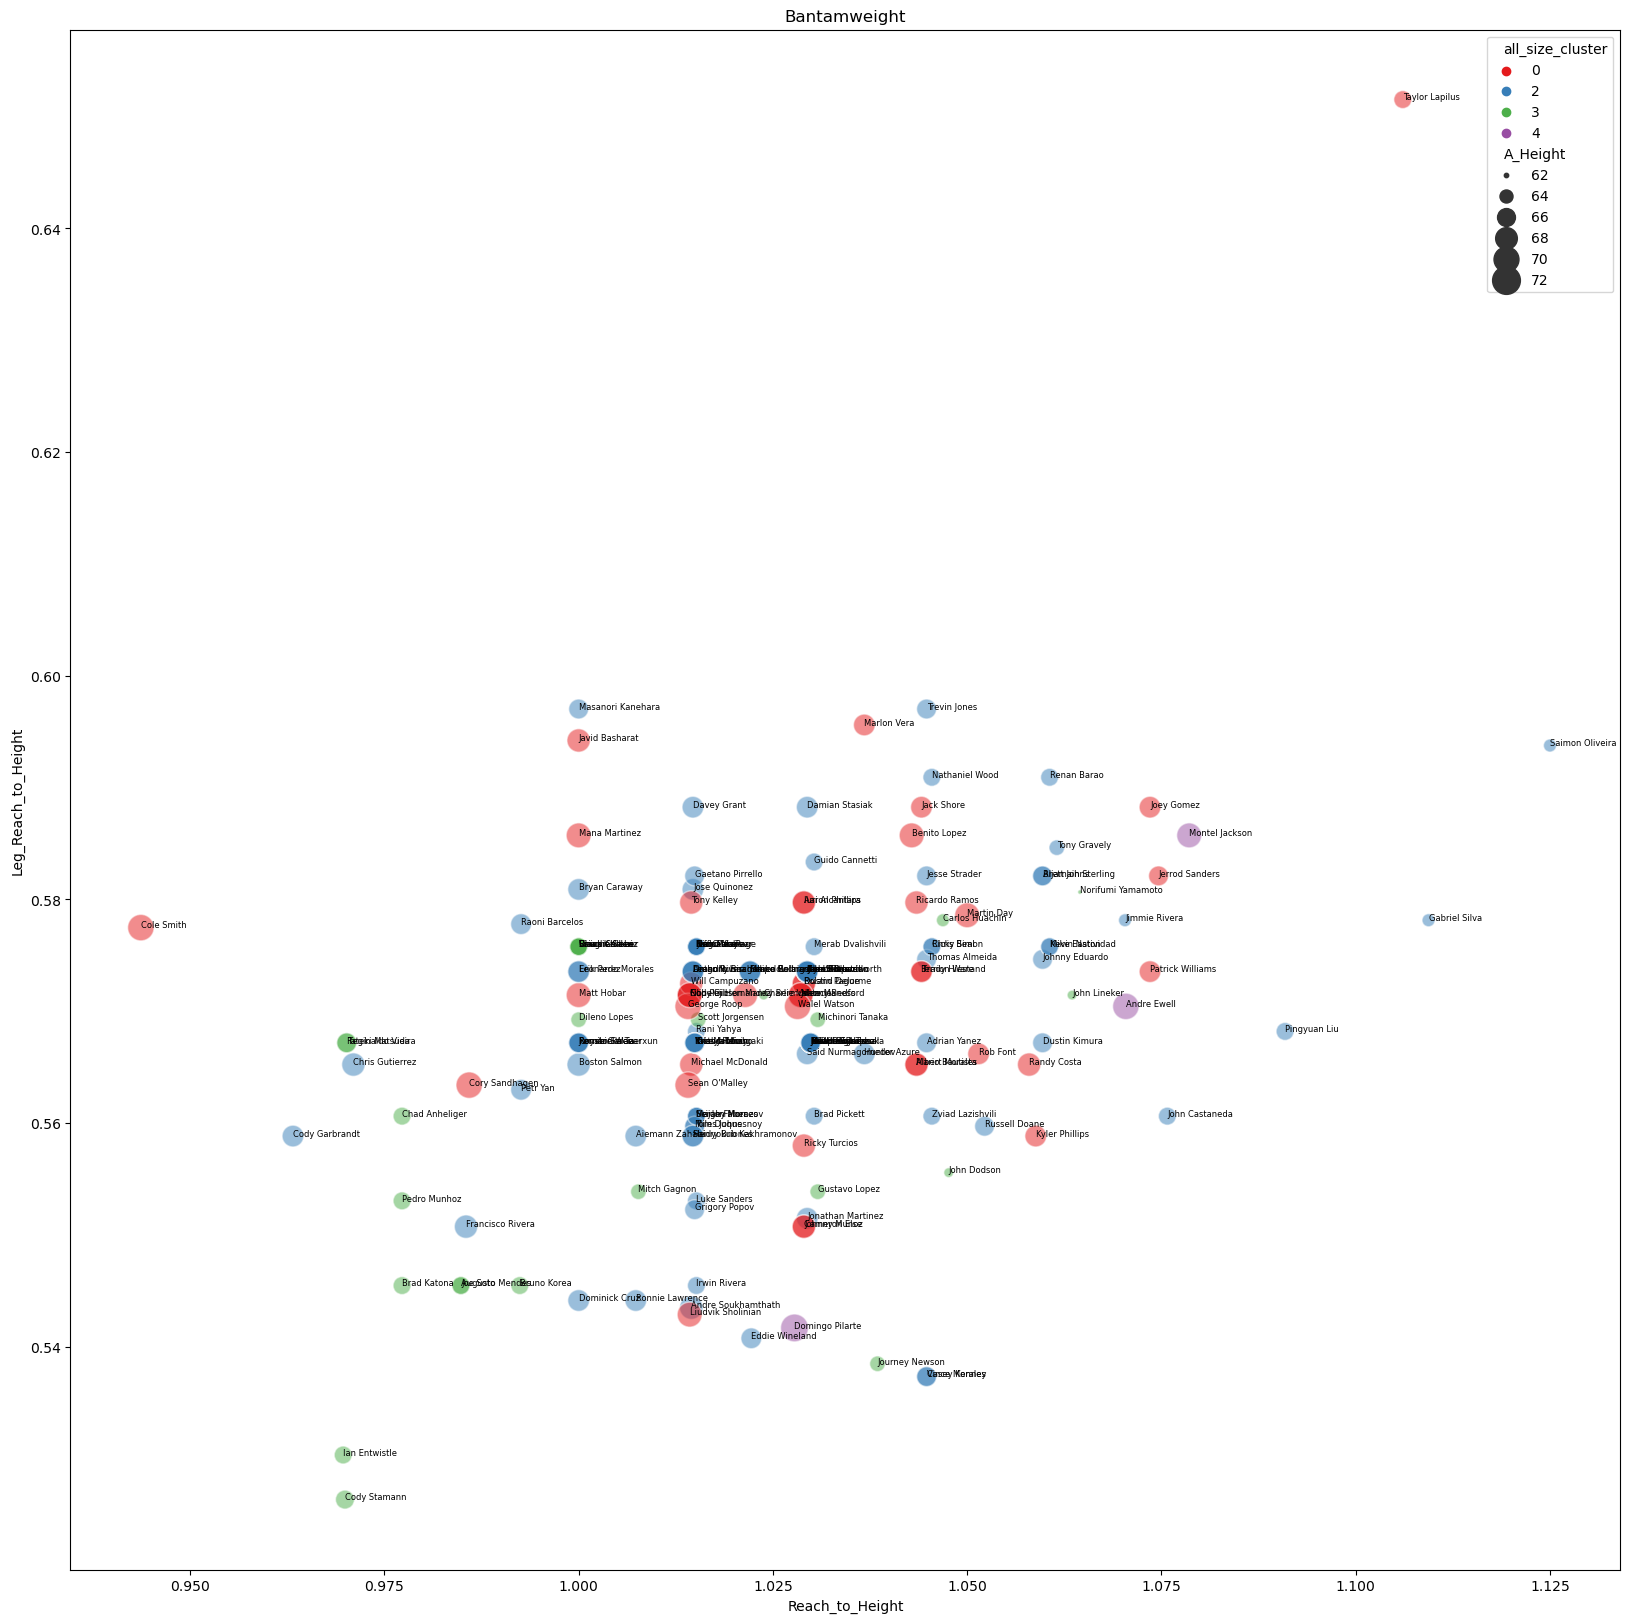

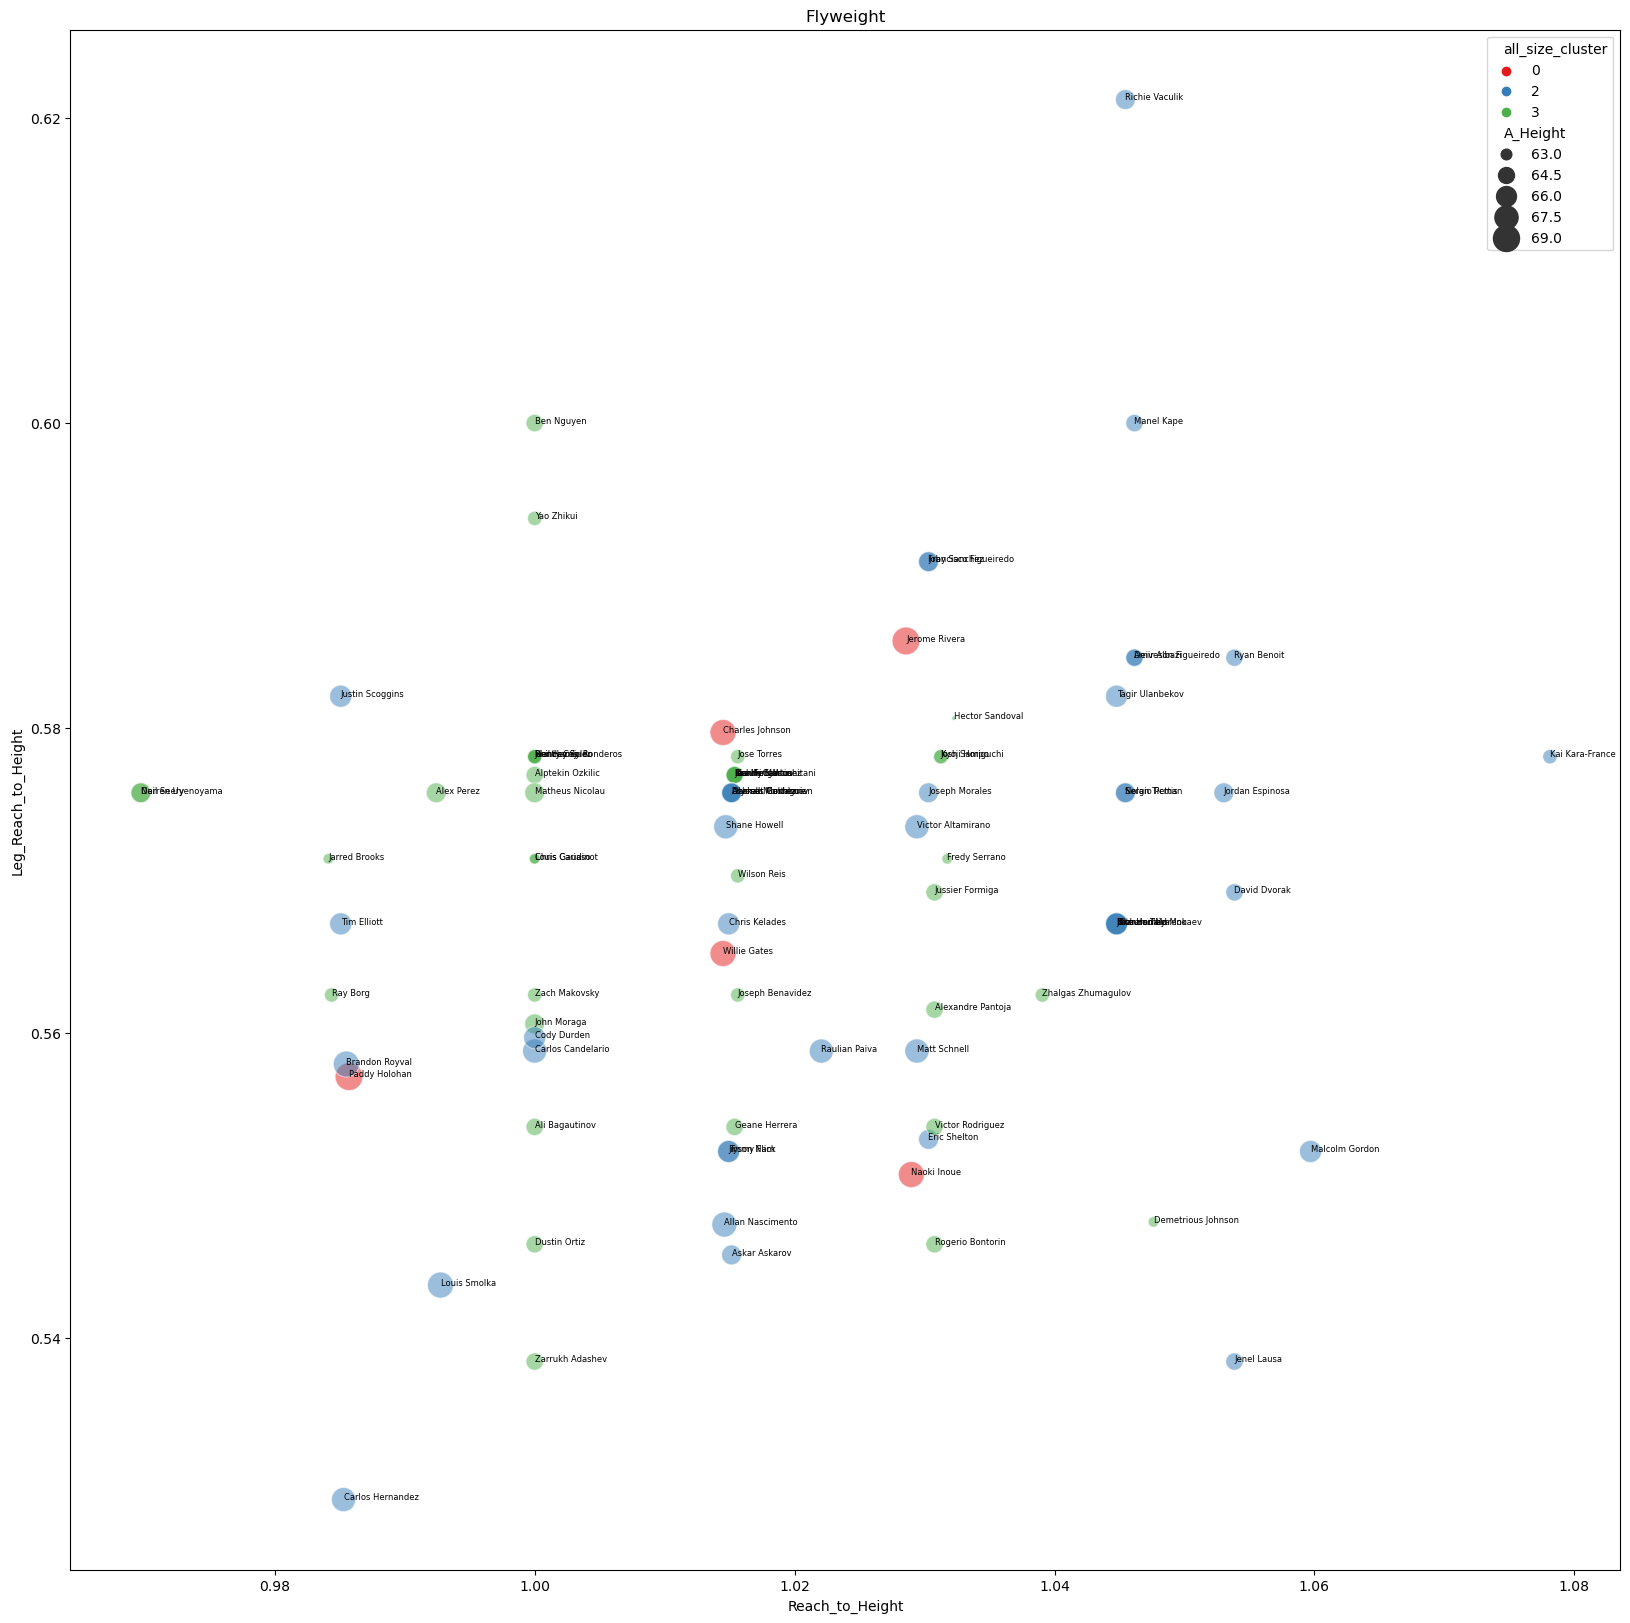

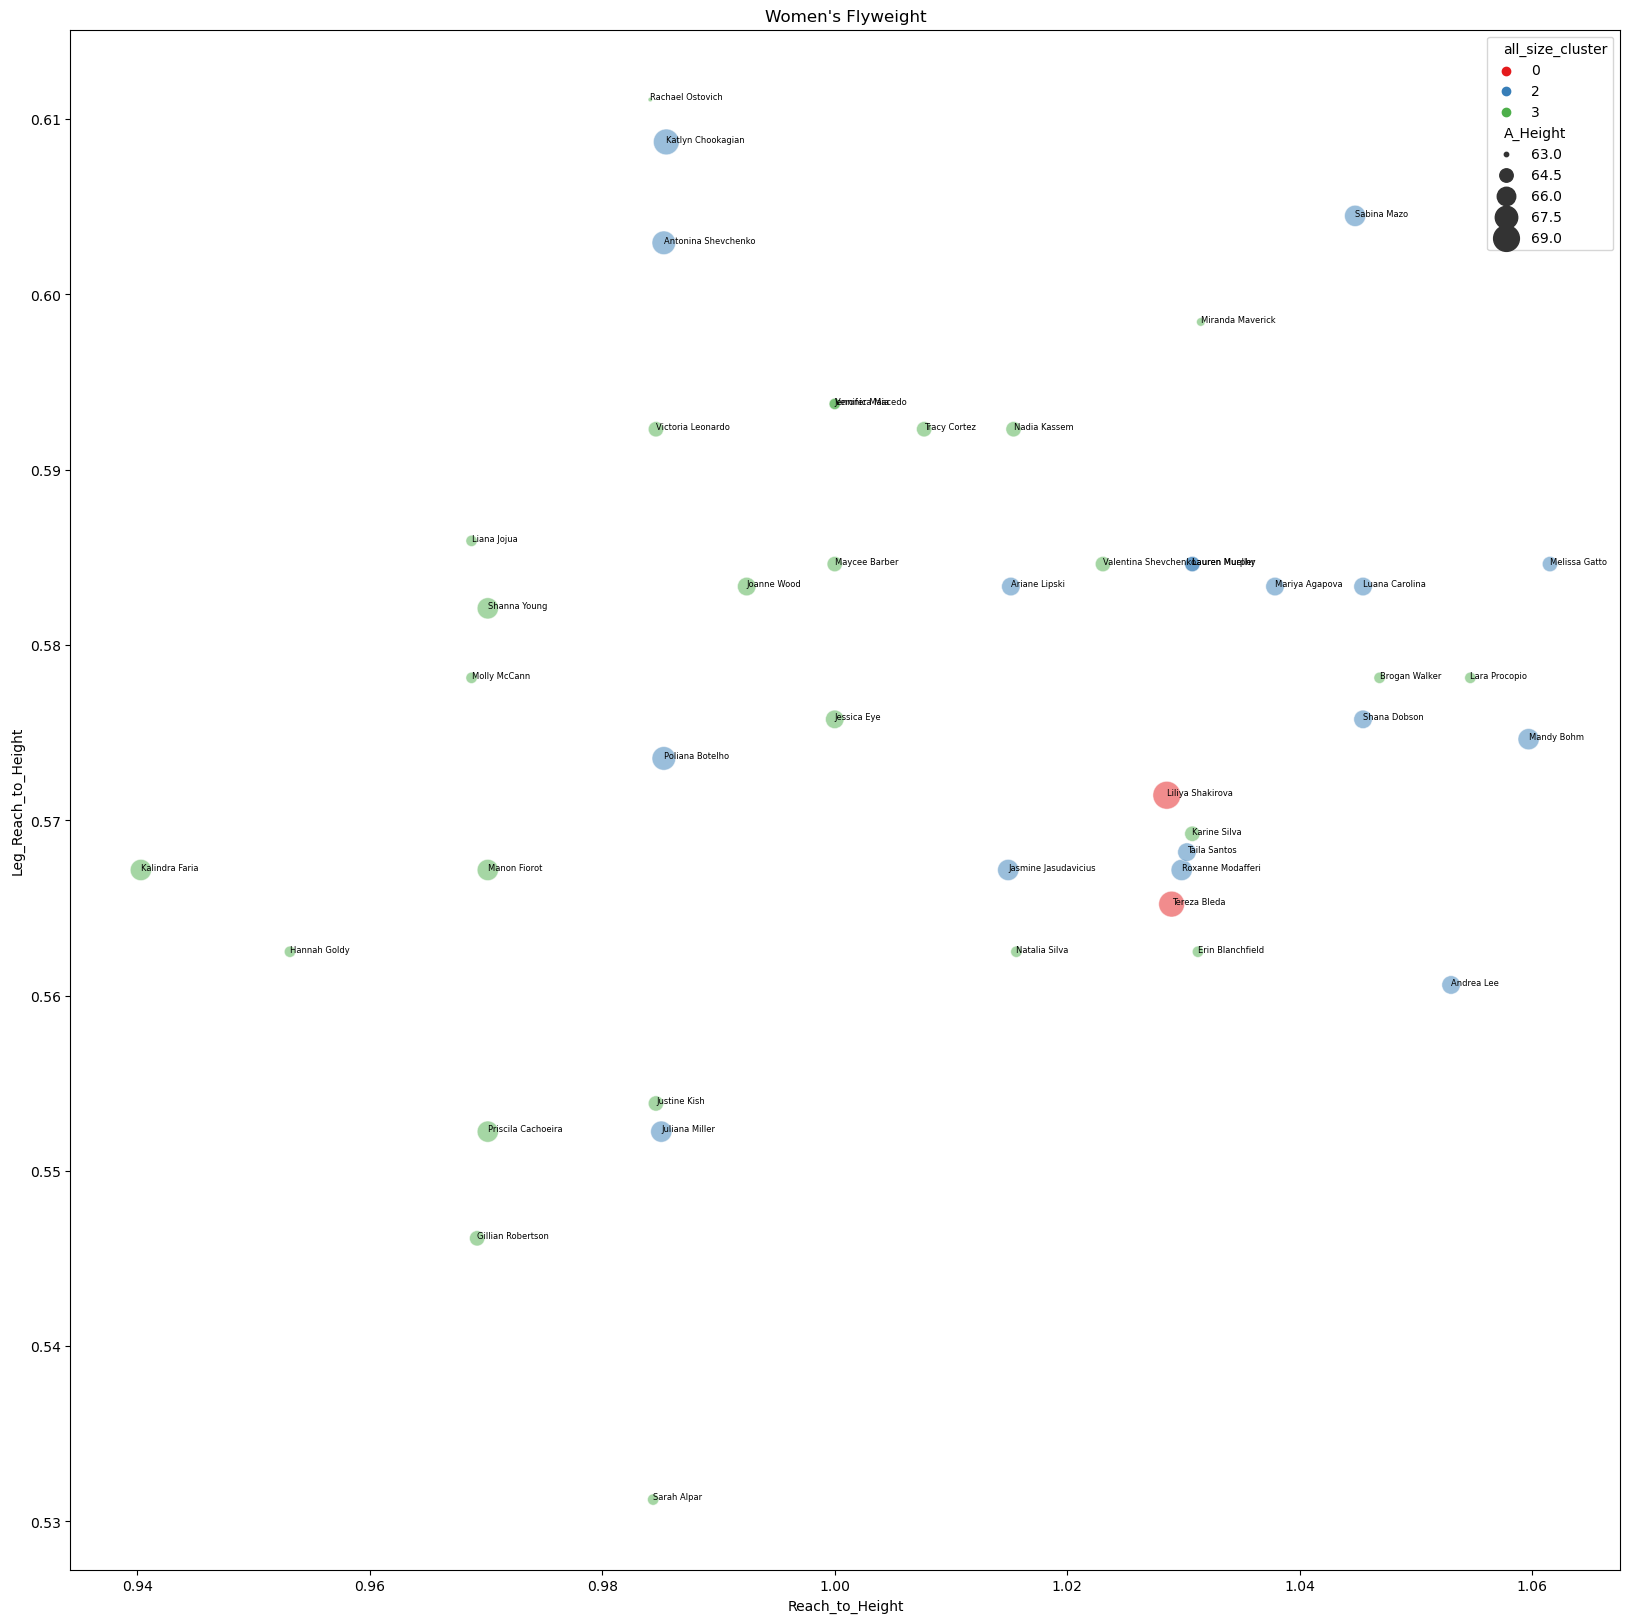

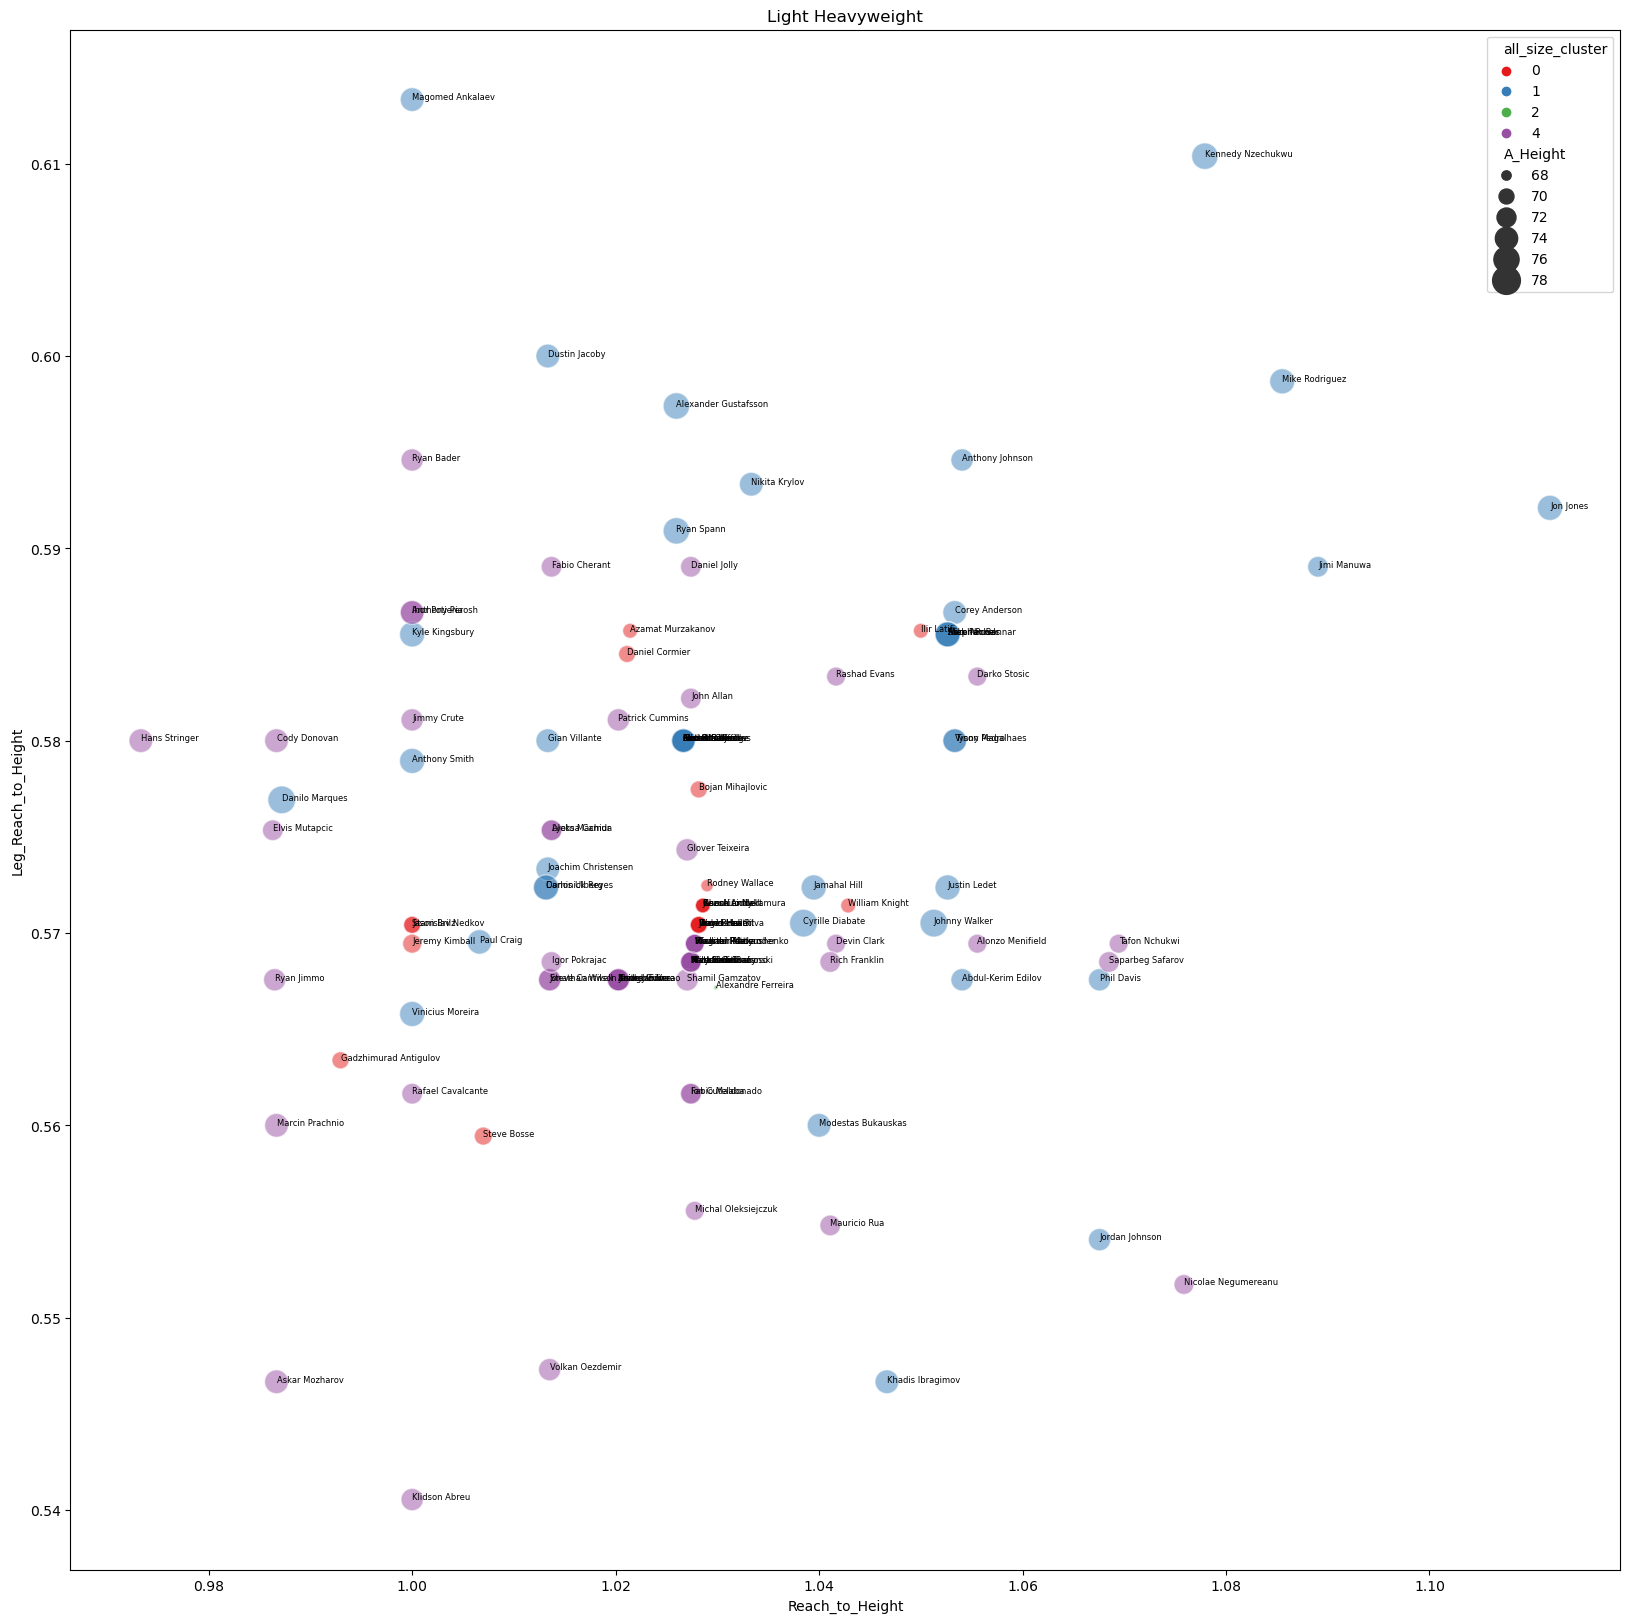

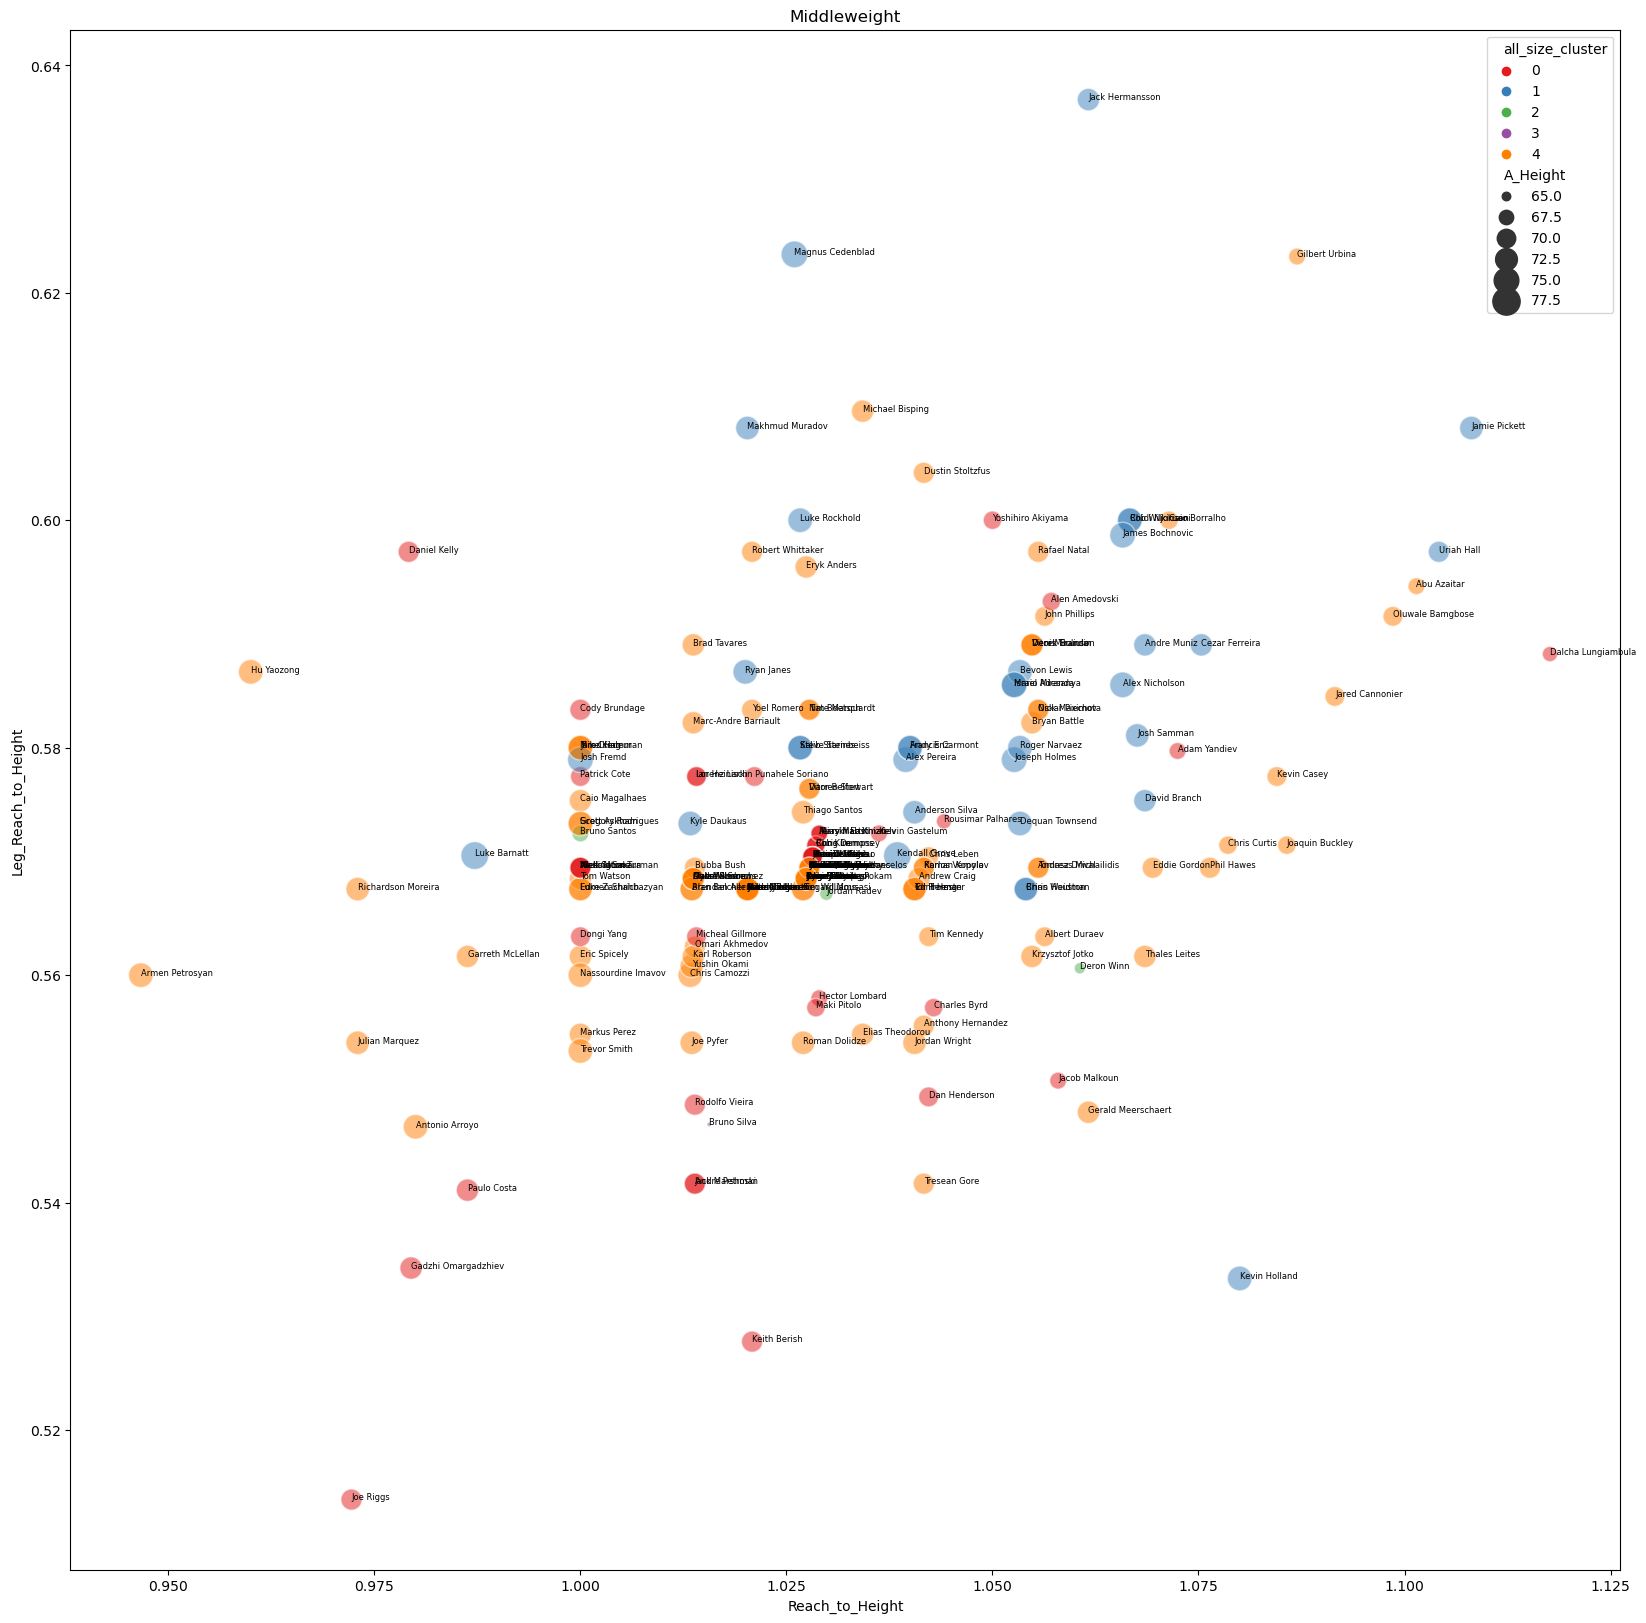

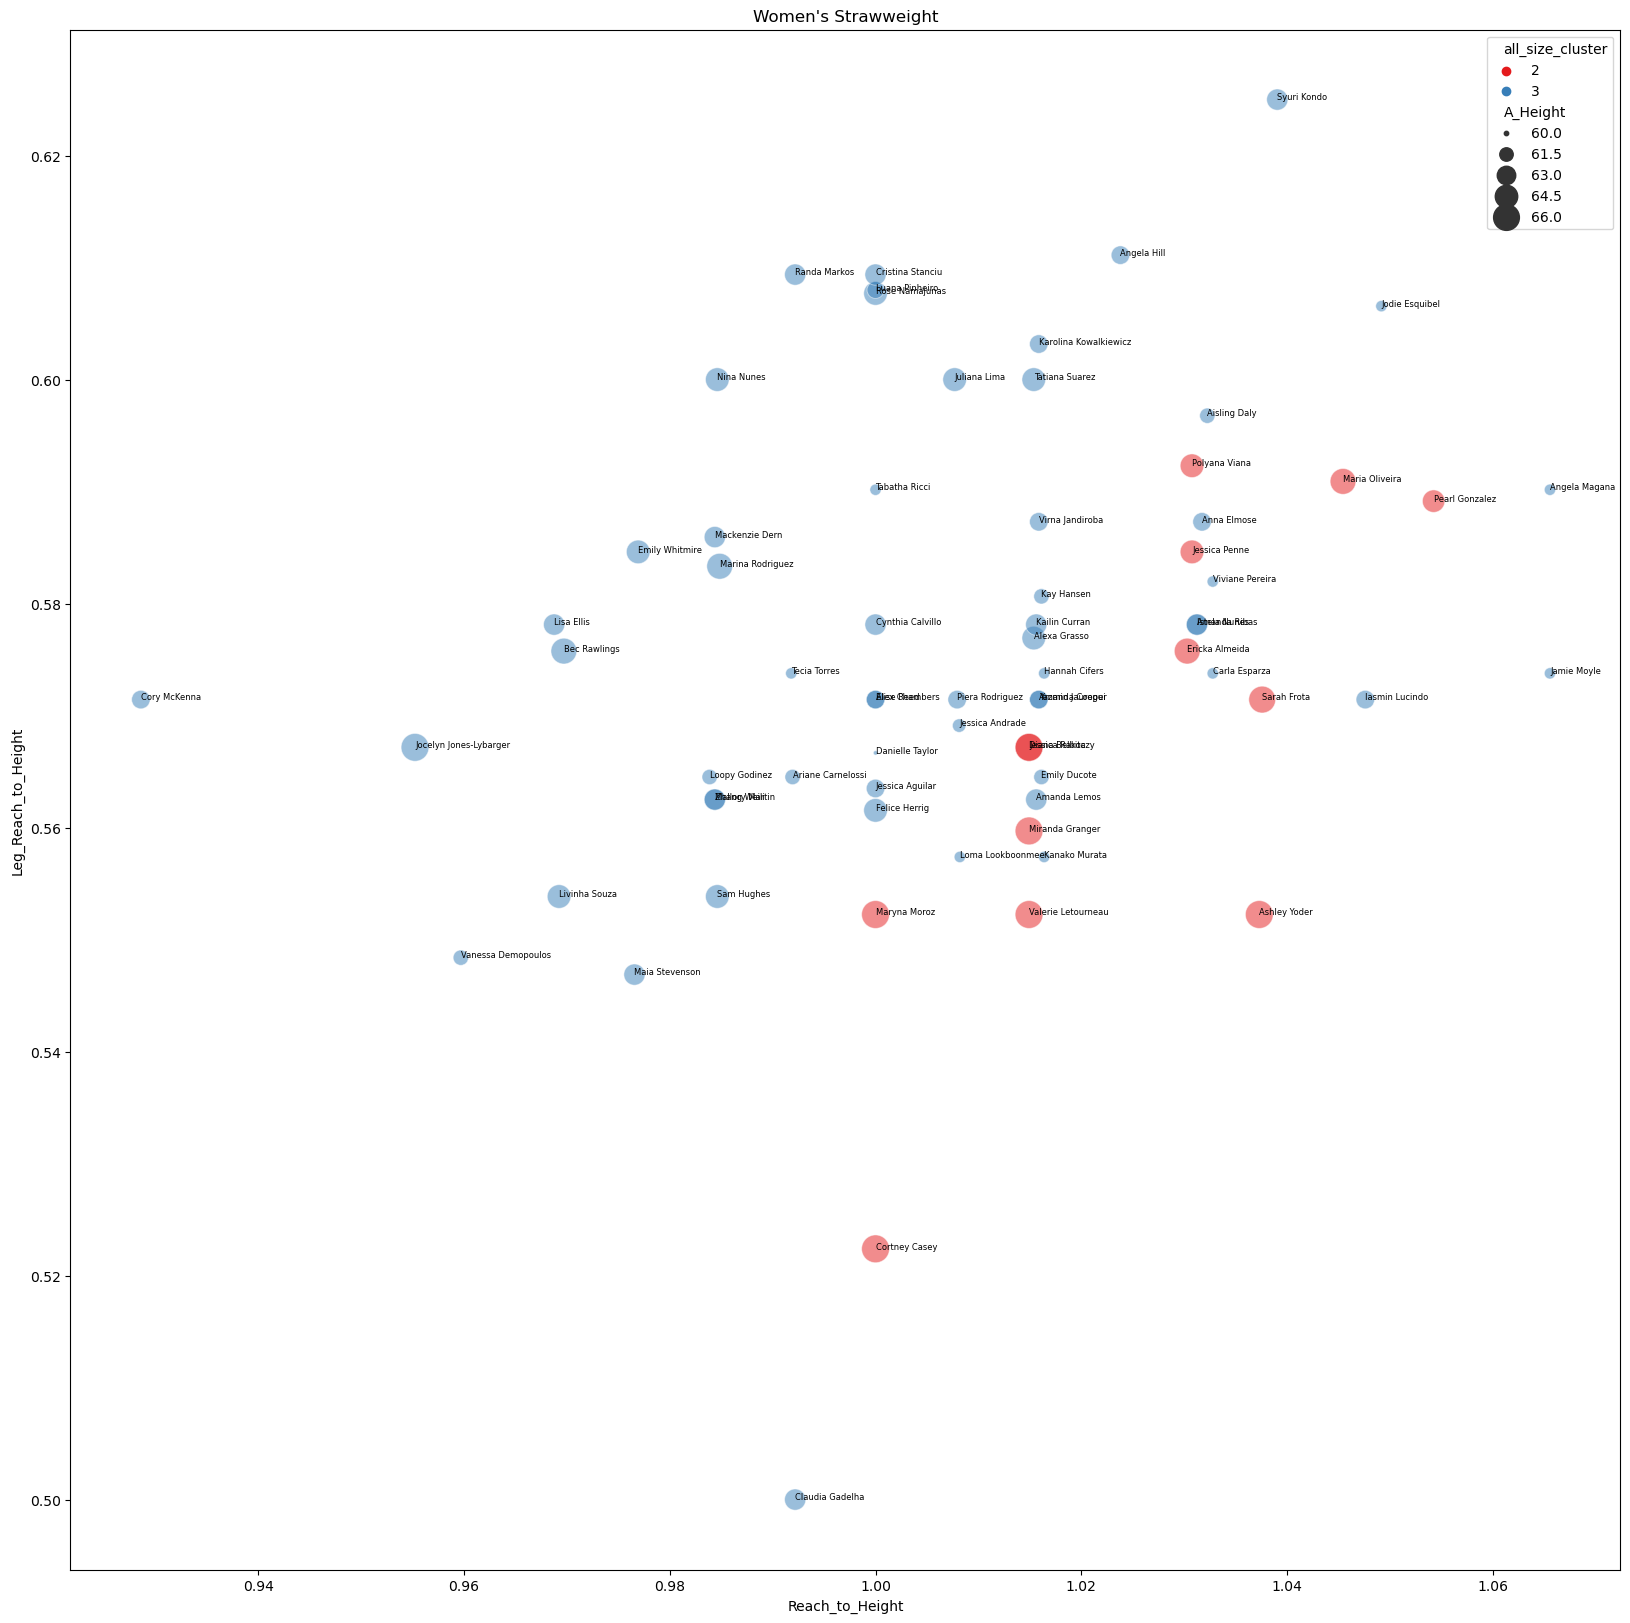

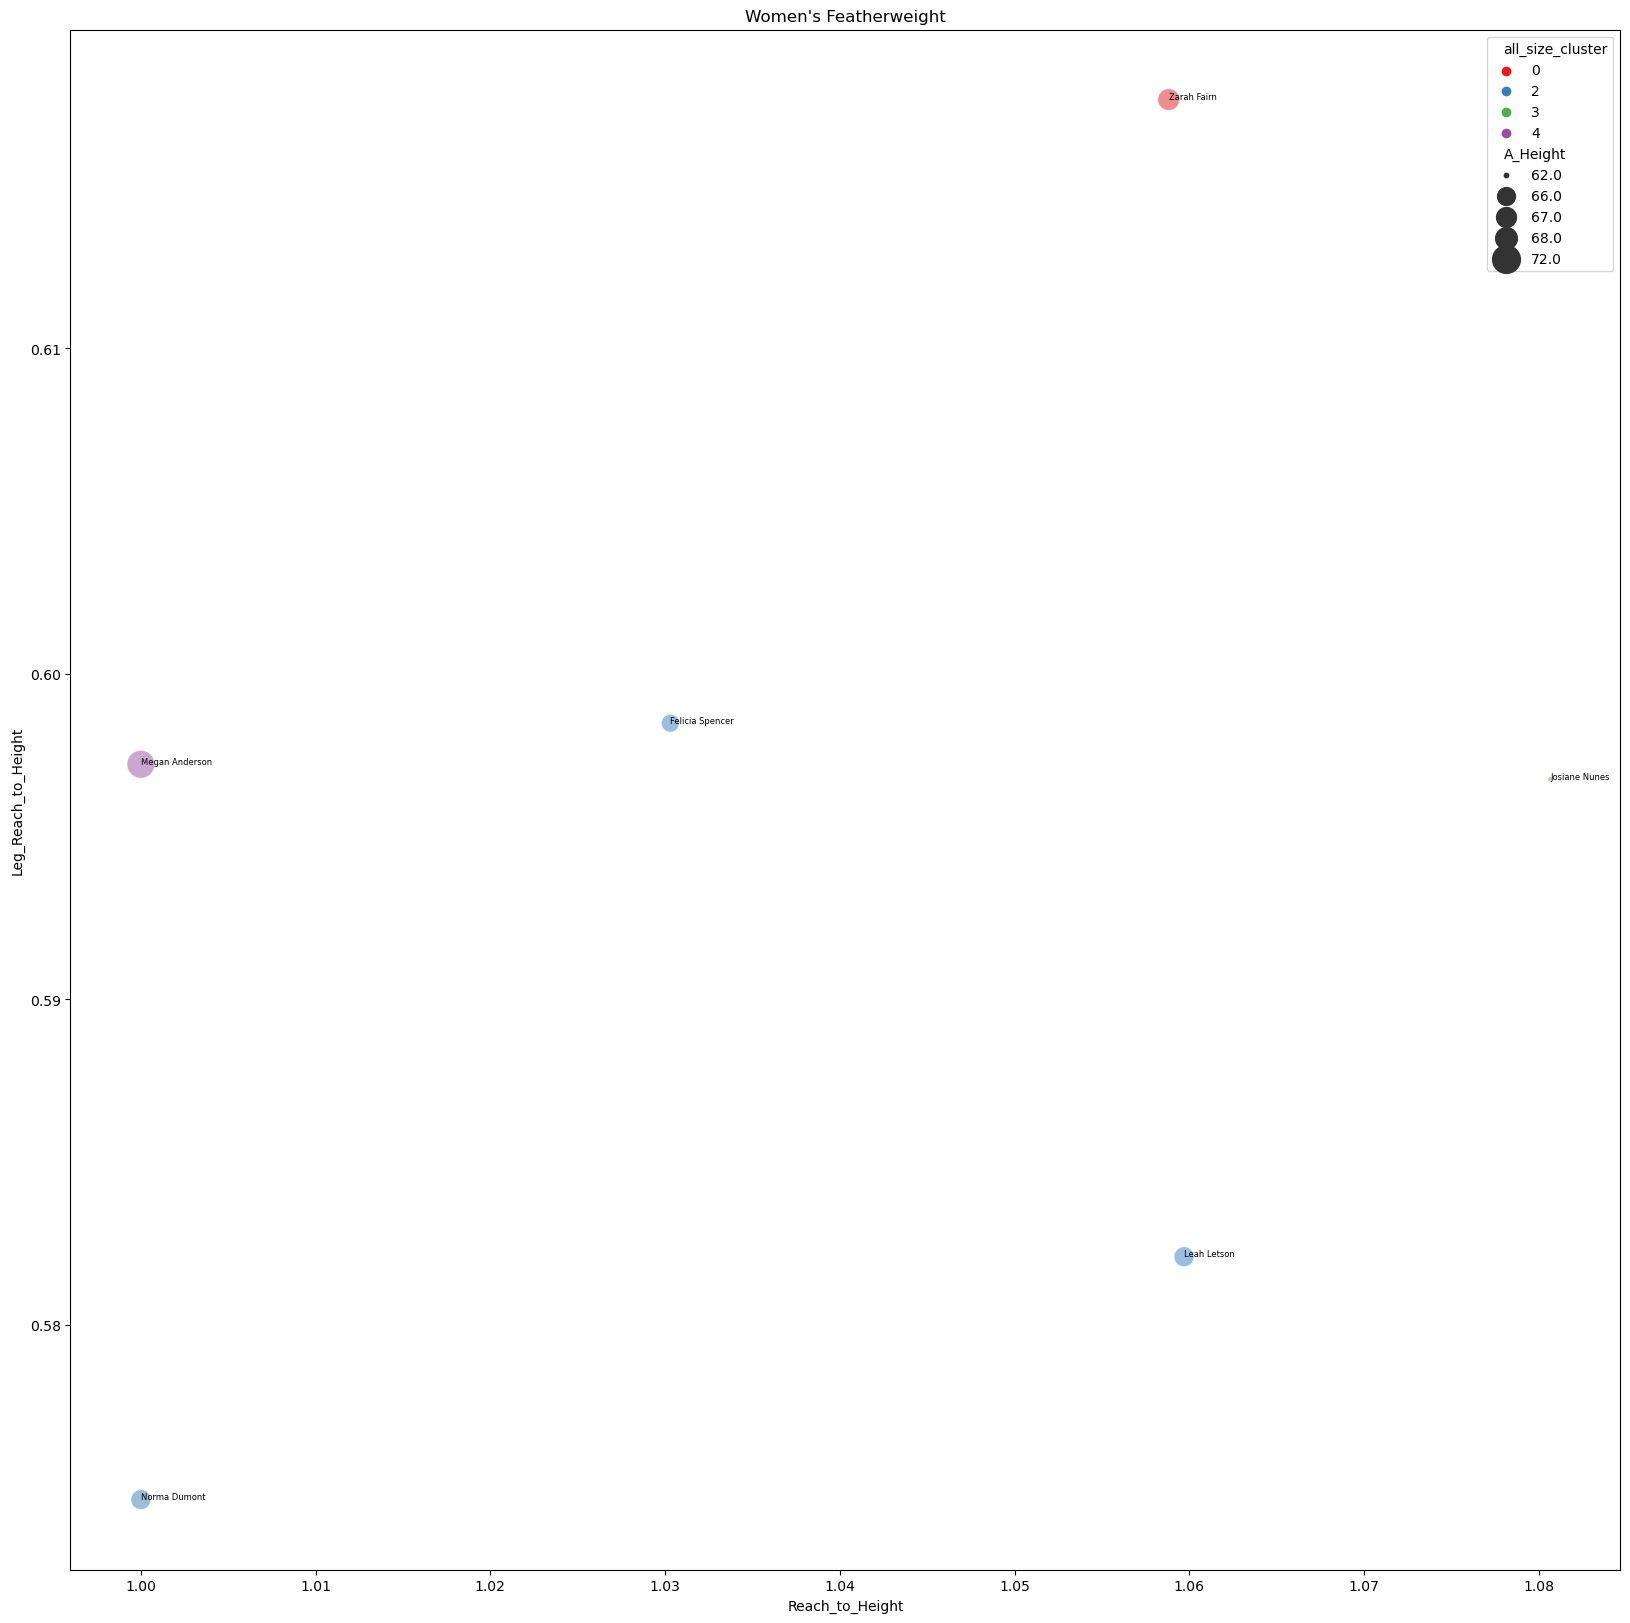

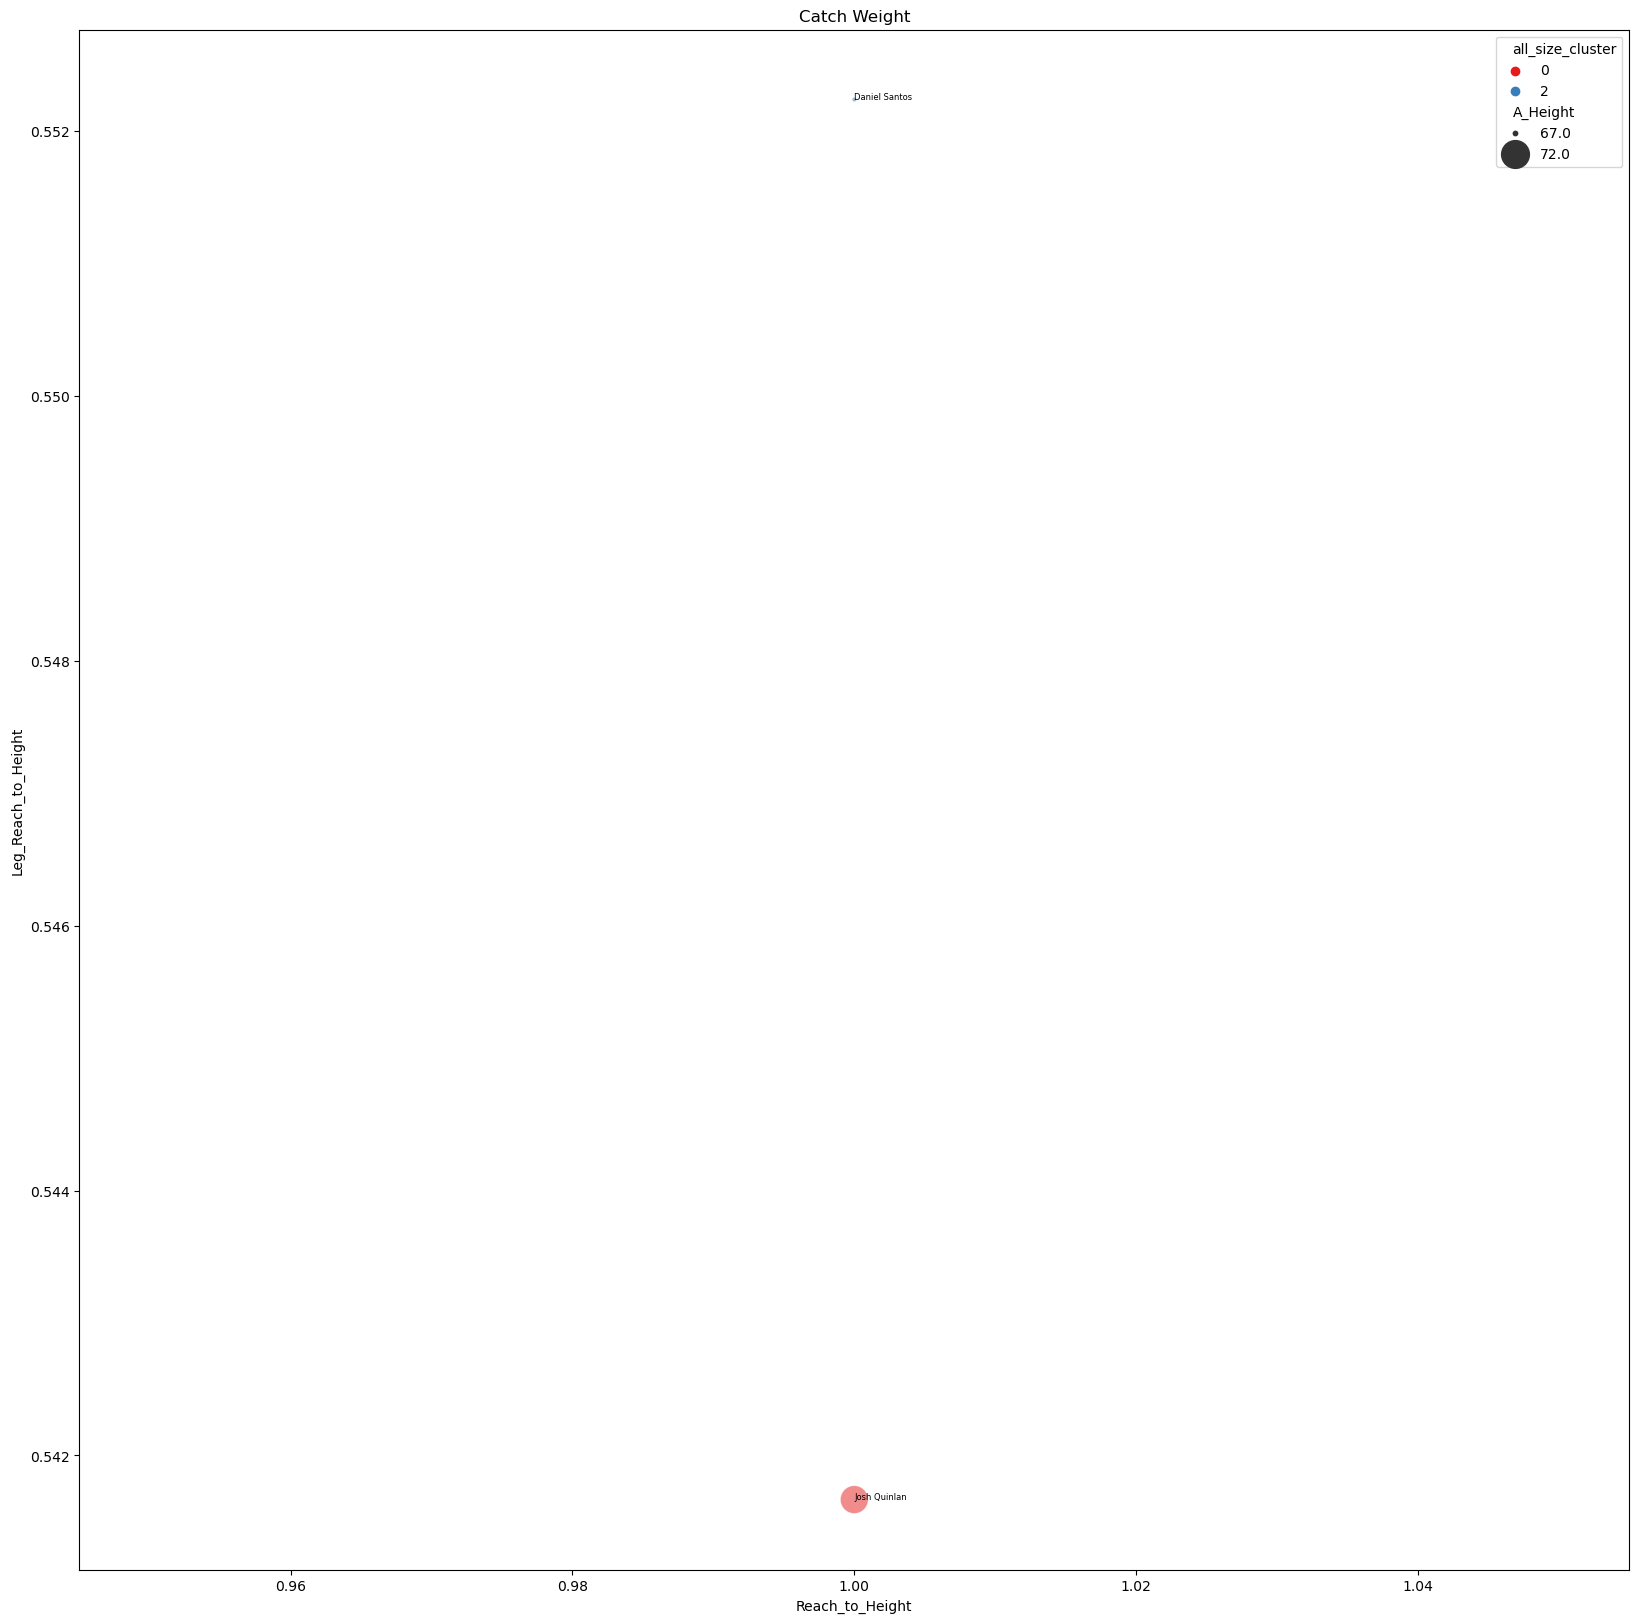

In [20]:
# plot clusters with seaborn scatter plot, filtered first by weightclass

for weightclass in df3['A_Typical_Weightclass'].unique():
    df4 = df3[df3['A_Typical_Weightclass'] == weightclass]
    sns.scatterplot(data=df4, x='Reach_to_Height', y='Leg_Reach_to_Height', size = 'A_Height', hue='all_size_cluster', palette='Set1', alpha=0.5, sizes=(10, 400))
    # add names to points
    for i, txt in enumerate(df4['Fighter_A']):
        plt.annotate(txt, (df4['Reach_to_Height'].iloc[i], df4['Leg_Reach_to_Height'].iloc[i]), size = 6)

    # make plot larger
    plt.rcParams["figure.figsize"] = (20,20)
    plt.title(weightclass)
    plt.show()
